## Used Cars Analysis
Y.P. Allen

**Background & Context**

There is a huge demand for used cars in the market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

**Objective:**  Develop a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. This will be done by:
   1. Explore and visualize the dataset.
   2. Build a linear regression model to predict the prices of used cars.
   3. Generate a set of insights and recommendations that will help the business.

**Data Variables:**
- S.No. : Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## Load Libraries

In [424]:
#!pip install nb-black

In [425]:
#%load_ext nb_black          # notebook extension makes the notebook format tidy

In [426]:
#Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Remove the limit from the number of displayed columns.
pd.set_option('display.max_columns', None)

# Set the limit from the number of displayed rows
pd.set_option('display.max_rows', 200)


# To build linear regression_model
from sklearn.linear_model import LinearRegression

# to create standardized scalings
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import necessary libraries.
import warnings

warnings.filterwarnings("ignore")


## Load Data and Initial Data Exploration

In [427]:
# Read in data and print the # of columns and rows for input data
cars = pd.read_csv("used_cars_data.csv", index_col=0)
print(f'There are {cars.shape[0]} rows and {cars.shape[1]} columns.')  

# Setting the random seed to sample 10 rows
np.random.seed(1)
cars.sample(n=10)

There are 7253 rows and 13 columns.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50


In [428]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [429]:
cars.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


Observations:

- There are 7253 rows and 13 columns for this data frame.
- The variables `Name`, `Location`, `Fuel Type`, `Trasnmission`, `Owner_Type`, `Mileage`, `Engine`, `Power` and `New_Price` are strings. 
- There are missing values in `New_Price` for this sample.
- The Index labeled `S.No.` is an index number that has a min and max value of 0 and 7252. This is not a real Serial Number.
- The `Mileage`, `Engine`, `Power` and `New_Price` contain string characters that will need to be removed for these to be reassigned as numerical values.

It is not clear if any columns need to be dropped yet.

In [430]:
# check data types and count of entries for each column
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 538.3+ KB


**Observations**

- The columns labeled `Name`, `Location`, `Fuel Type`, `Trasnmission`, `Owner_Type`, `Mileage`, `Engine, Power` and `New_Price` are objects.
- Only `Name`, `Location`, `Fuel Type`, `Trasnmission`, and `Owner_Type` should be categorical.
- The other variables, `Mileage`, `Engine, Power` and `New_Price` should be numberical.
- The maximum number of entries is 7253 count. There are missing values for columns 7 through 12. `Mileage` has 7251 entries, `Engine and Power` each have 7207 entries, `Seats` have 7200 counts, `New_Price` has 1006 entries, and `Price` has 6019 entries.
- We can not delete rows based on the missing `New_Price` values because most of the entries are missing. So missing values will need to be categorized as Missing.

In [431]:
# Which columns have the most missing values
cars.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

This confirms that the `New_Price` has the most missing values followed by the `Price`. `Power` and `Engine` may be missing values in the same rows.

In [432]:
#count the number of unique values in each column
cars.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [433]:
# Get the 5 number summary of all of the columns
cars.describe(include="all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000
unique,2041,11,NaN,NaN,5,2,4,450,150,386,NaN,625,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [434]:
# QC value counts for non-numeric features

num_to_display = 10  # define # upfront
for colname in cars.dtypes[cars.dtypes == 'object'].index:
    val_counts = cars[colname].value_counts(dropna=False)  # False to see NaN counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Toyota Fortuner 3.0 Diesel    35
Maruti Ritz VDi               35
Honda City 1.5 V MT           32
Hyundai Grand i10 Sportz      32
Honda Amaze S i-Dtech         32
Name: Name, dtype: int64
Only displaying first 10 of 2041 values.



Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Manual       5204
Automatic    2049
Name: Transmission, dtype: int64



First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64



17.0 kmpl     207
18.9 kmpl     20

**Insights**

- There are 2041 different car names (Brand + Model) listed in this file.
- The listed vehicles are listed in 11 different Indian cities.
- This data represents vehicles manufactured from 1996 to 2019.
- This data contains vehicles with 5 to 10 seat capacity. A value of zero has been input, this will need to be investigated.
- There are 5 different fuel types, 150 engine displacement volumes, and 2 different Transmission types.
- The Total mileage from previous owner ranges from 171 to 6,500,000 km.
- There are 4 types of ownership. This will need to be investigated.
- The Mileage has 450 unique values listed. This will need to be investigated.
- The New Price has 625 unique values.
- The Price ranges from 0.44 to 160 Lakhs, with a mean of 9.47 Lakhs. There are Price outliers in this dataset.


## Explatory Data Analysis and Pre-processing Columns

### Univariate Analysis

In [435]:
# Look at central tendency and dispersion with a function that 1. inputs numerical column and 2. outputs boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,           # Number of rows of the subplot grid=2
        sharex=True,       # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )                      # creating 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="lightgrey"
    )                      # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )                      # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )                      # Add the mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )                      # Add the median to the histogram

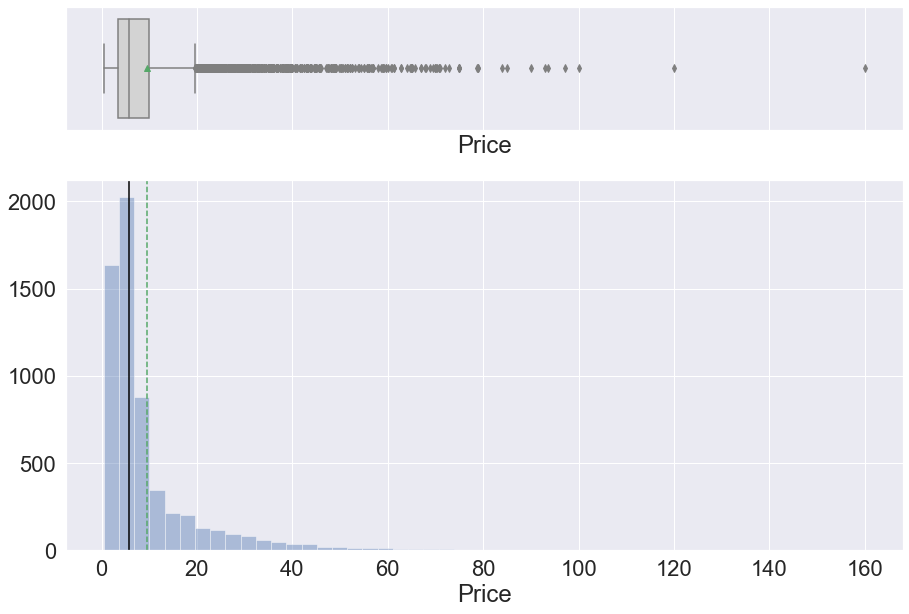

In [436]:
# Let's explore the dependent variable - the Price
histogram_boxplot(cars.Price)

**Observations:**
- The Price has a right skew.
- There are several outliers that will need to be investigated.

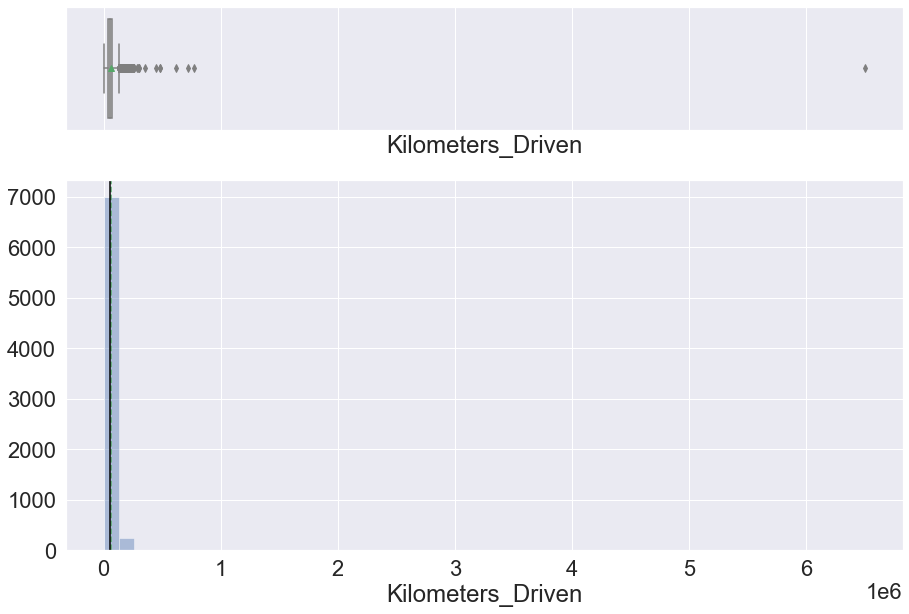

In [437]:
# Let's explore the independent variable - Miles_Driven
histogram_boxplot(cars.Kilometers_Driven)

**Observations:**
- There is a right skew to the Kilometers Driven distribution.
- There is at least one extreme outlier (>600,000) that will need to be investigated. This extreme value may be due to an input error.

To look at the dispersion of the other numberical columns, some editing is required.


The New_Price column needs to be edited since it contains the Lakh annotation. But let's confirm that this is the only column with this issue.

In [438]:
# Save a copy of the dataset before pre-processing
orig_cars = cars.copy () # Make a copy to test this out

# Print the names of the columns ending with the character 'Lakh'

money_cols = []
for colname in cars.columns[cars.dtypes == 'object']:  # only consider string columns
    if cars[colname].str.endswith('Lakh').any():       # using `.str` so we can use an element-wise string method
        money_cols.append(colname)

print('The columns with Lakh in the entries are:',money_cols)

The columns with Lakh in the entries are: ['New_Price']


This confirms that we only need to fix this in the New Price.

In [439]:
# Define a function to remove the Lakh and Cr from the Price column
def price_to_num(car_val):
    """This function takes in a string representing a Price in Lakhs
    and converts it to a number. For example, '10 Lakh' becomes 10.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(car_val, str):  # checks if car_val is a string
        car_val.replace(' ','')
        if car_val.endswith('Lakh'):
            return float(car_val.replace('Lakh',''))
        if car_val.endswith('Cr'):
            return float(car_val.replace('Cr',''))   # further investigation of the data shows a second currency - Cr
    else:
        return np.nan       # Return the NaN values for the non-string entries


In [440]:
for colname in money_cols:
    cars[colname] = cars[colname].apply(price_to_num)    

cars[money_cols].head()    # Confirm that the values are as expected

,New_Price
S.No.,
0,NaN
1,NaN
2,8.61
3,NaN
4,NaN


In [441]:
# check data types and count of entries for each column
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 566.6+ KB


The total number of non NaN entries is confirmed to be 1006 as before and the Data type is float64.

Now let's edit the other columns: `Mileage`, `Engine`, and `Power`.

In [442]:
# Print the names of the columns ending with the character 'kmpl', 'CC', or 'bhp'
# Intiate the lists
mileage_cols = []
engine_cols = []
power_cols = []

for colname in cars.columns[cars.dtypes == 'object']:  # only consider string columns
    if cars[colname].str.endswith('kmpl').any():       # using `.str` so we can use an element-wise string method
        mileage_cols.append(colname)    

    elif cars[colname].str.endswith('CC').any():       # using `.str` so we can use an element-wise string method
        engine_cols.append(colname) 
        
    elif cars[colname].str.endswith('bhp').any():       # using `.str` so we can use an element-wise string method
        power_cols.append(colname) 
        
print('The columns with kmpl in the entries are:',mileage_cols)
print('The columns with CC in the entries are:',engine_cols)
print('The columns with bhp in the entries are:',power_cols)


The columns with kmpl in the entries are: ['Mileage']
The columns with CC in the entries are: ['Engine']
The columns with bhp in the entries are: ['Power']


In [443]:
# Define a function to remove the kmpl and km/kg from the Mileage column
def mileage_to_num(kmpl):      
    """Makes a mileage of the form 50 kmpl (i.e. km per liter or kg) to an integer value
    Non-string mileages are treated as missing."""
    if isinstance(kmpl, str):
        kmpl.replace(' ','')         # remove the empty space
        if kmpl.endswith('kmpl'):
            return float(kmpl.replace('kmpl',''))   # return a float number after removing the unit label
        if kmpl.endswith('km/kg'):
            return float(kmpl.replace('km/kg',''))
    else:
        return np.nan             # Return the NaN values for the non-string entries
    
# Define a function to remove the cc from the Engine column
def engine_to_num(cc):      
    """Makes an engine displacement of the form 50 CC (i.e. cubic centimeters) to an integer value
    Non-string engine displacements are treated as missing."""
    if isinstance(cc, str):
        cc.replace(' ','')         # remove the empty space
        if cc.endswith('CC'):
            return float(cc.replace('CC',''))        # return a float number after removing the unit label
    else:
        return np.nan             # Return the NaN values for the non-string entries    
    
# Define a function to remove the bhp from the Power column
def power_to_num(bhp):      
    """Makes a power of the form 50 bhp (i.e. horsepower) to  an integer value
    Non-string mileages are treated as missing."""
    if isinstance(bhp, str):
        bhp.replace(' ','')        # remove the empty space
        if bhp.endswith('bhp'):
            if bhp.startswith('null'):        # return a NaN for the null bhp entries
                return np.nan
            else:               
                return float(bhp.replace('bhp',''))       # return a float number after removing the unit label
    else:
        return np.nan             # Return the NaN values for the non-string entries    

In [444]:
# Apply all in one go with a column transformation

col_transforms = {
    'Mileage': mileage_to_num,
    'Engine': engine_to_num,
    'Power' : power_to_num
}

# k is the key, so the column name here
# v is the value, which a function in this case and is either `mileage_to_num` or `engint_to_num` or `power_to_num`
for k,v in col_transforms.items():
    cars[k] = cars[k].map(v)

In [445]:
cars.head()    # Confirm that the Mileage, Engine, and Power values are as expected

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [446]:
# Check data types and count of entries for each column
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 651.6+ KB


The non-null count for Mileage and Engine are the same as before. There are fewer values for the Power column since we re-assigned the null bhp values to NaN.

In [447]:
# Again check the data summary of variables after some editing
cars.describe(include="all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
unique,2041,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN
freq,55,949,NaN,NaN,3852,5204,5952,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,18.141580,1616.573470,112.765214,5.279722,19.894324,9.479468
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,4.562197,595.285137,53.493553,0.811660,19.813947,11.187917
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,1.000000,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,75.000000,5.000000,7.635000,3.500000
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,18.160000,1493.000000,94.000000,5.000000,11.270000,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1968.000000,138.100000,5.000000,23.640000,9.950000


**Observations:**

- This now includes numerical summary Mileage, Engine, and Power variables
- Two of the rows are missing Mileage values - will look into this
- 46 rows are missing the Engine values - will look into this
- 175 rows are missing the Power values - will look into this


### Split Name into Make and Model

In [448]:
# Create two dataframe for the Make and Model
MakeModel = cars['Name'].str.split(' ', n = 1, expand = True) 
MakeModel.head(10)

,0,1
S.No.,,
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic
5,Hyundai,EON LPG Era Plus Option
6,Nissan,Micra Diesel XV
7,Toyota,Innova Crysta 2.8 GX AT 8S
8,Volkswagen,Vento Diesel Comfortline


In [449]:
cars.drop(['Name'], axis=1, inplace=True)
cars["Make"]= MakeModel[0]   
cars["Model"]= MakeModel[1]

del MakeModel  # delete this temporary Make and Model dataframe

cars.head()  #  Check columns

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model
S.No.,,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


### Assign Categorical Values

In [450]:
# Assign Categorical Values
cat_vars = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Make', 'Model']

for colname in cat_vars:
    cars[colname] = cars[colname].astype('category')
    
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7251 non-null   float64 
 7   Engine             7207 non-null   float64 
 8   Power              7078 non-null   float64 
 9   Seats              7200 non-null   float64 
 10  New_Price          1006 non-null   float64 
 11  Price              6019 non-null   float64 
 12  Make               7253 non-null   category
 13  Model              7253 non-null   category
dtypes: category(6), float64(6), int64(2)
memory usage: 616.9 KB


### Distribution of Numerical Variables

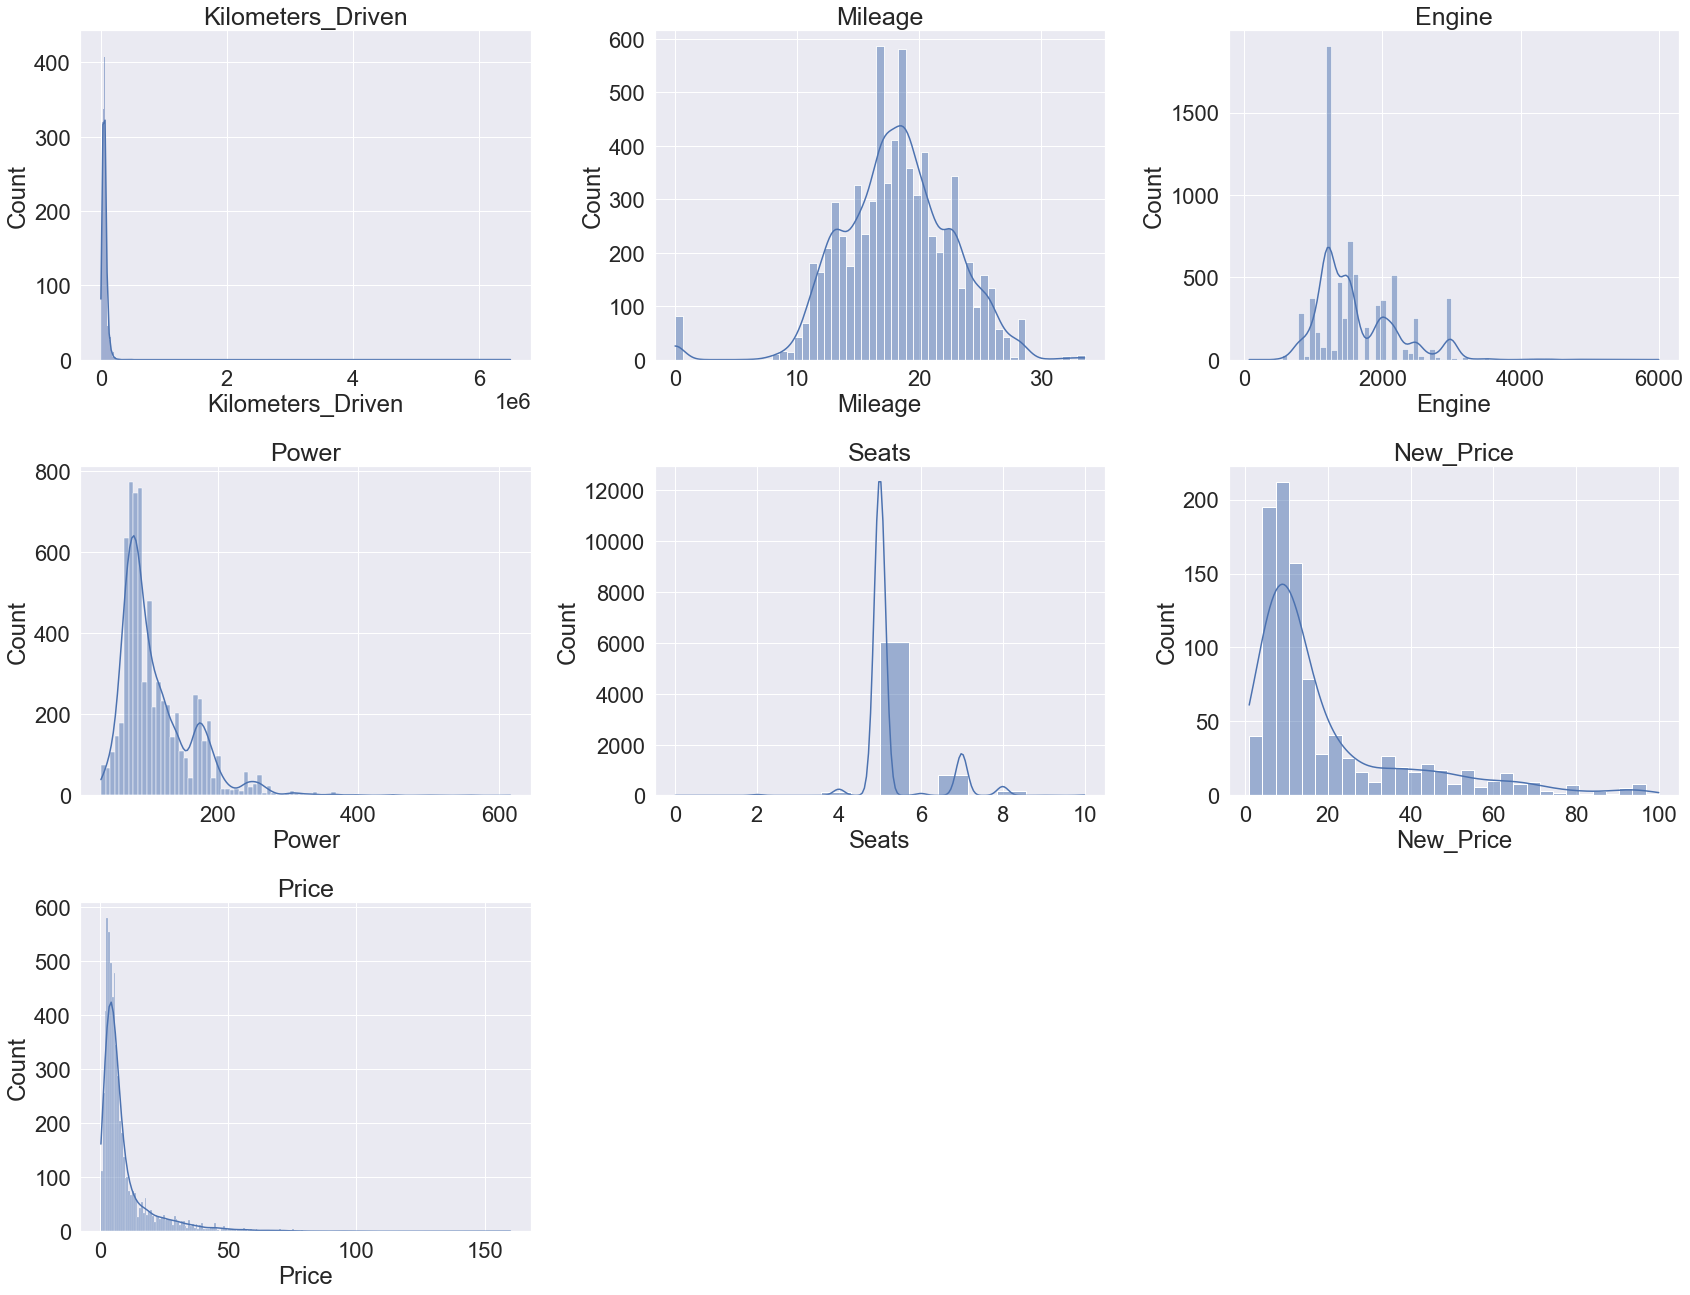

In [451]:
all_col = cars.select_dtypes(include=np.number).columns.tolist()  # create a list of the numeric columns
all_col.remove("Year")                      # remove the year from the numeric column list
plt.figure(figsize=(24, 48))

for i in range(len(all_col)):                # create a subplot for display of distributions
    plt.subplot(8, 3, i + 1)
    #plt.hist(cars[all_col[i]])               # without distribution (kde) curves
    sns.histplot(cars[all_col[i]], kde=True)  # with distribution (kde) curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

**Observations:**
- Mileage has a normal distribution.
- Kilometers driven, Engine, Power, New Price, and Price have right skew distributions.
- Outliers will need to be investigated for Kilometers driven, Engine, Power, New Price, and Price.
- Most vehicles have 5 seats, but there are some with more seating.
- The dispersion of the Price of a secondary vehicle is larger than the dispersion of the New Price for a brand new vehicle. This suggests that there is an outlier(s) in the Price column.

## Basic Summary Statisitics

### Text Processing

In [452]:
# How many vechicles are in Make that start with 'A'?
cars['Make'].str.startswith('A').sum()

286

In [453]:
# How many letters and words in the Model names?

# i == i as a quick check for NaNs  !
# Use .title() in case of capitalization issues
model_data = pd.DataFrame(
    data = [(i, len(i), len(i.split())) if i == i else (i, 0, 0)  #creates a tuple, i is entry name, followed by length of model name (characters), and then length of model name when split is the number of words. There is a check for NaNs.
            for i in cars['Model'].str.strip().str.title().unique()],  #loop through club names
    columns = ['Model', 'Number of Letters', 'Number of Words']
)
model_data.head()

,Model,Number of Letters,Number of Words
0,Wagon R Lxi Cng,15,4
1,Creta 1.6 Crdi Sx Option,24,5
2,Jazz V,6,2
3,Ertiga Vdi,10,2
4,A4 New 2.0 Tdi Multitronic,26,5


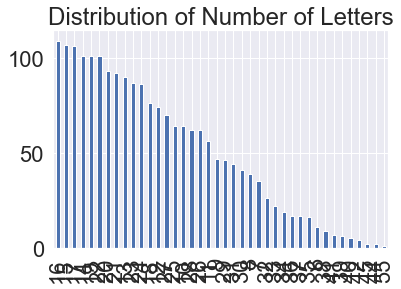

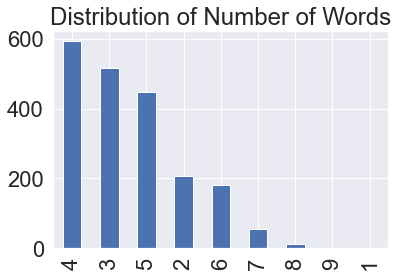

These are the Models with the most words in the name:


460    X5 2014-2019 Xdrive 30D Design Pure Experience...
Name: Model, dtype: object

In [454]:
model_data['Number of Letters'].value_counts().plot.bar()
plt.title('Distribution of Number of Letters')
plt.show()
model_data['Number of Words'].value_counts().plot.bar()
plt.title('Distribution of Number of Words')
plt.show()

print('These are the Models with the most words in the name:')
model_data.loc[model_data['Number of Words'] == model_data['Number of Words'].max(), 'Model']

In [455]:
print('The maximum # of words in a Model name is', model_data['Number of Words'].max())
model_data[model_data['Number of Words']==9]

The maximum # of words in a Model name is 9


,Model,Number of Letters,Number of Words
460,X5 2014-2019 Xdrive 30D Design Pure Experience...,55,9


In [456]:
print('The minimum # of words in a Model name is', model_data['Number of Words'].min())
model_data[model_data['Number of Words']==1]
# The entry for this one word Model name may be an error, it could be labeled with two words
# A comparison to the two word Model names could help clarify this

The minimum # of words in a Model name is 1


,Model,Number of Letters,Number of Words
1993,1.4Gsi,6,1


In [457]:
model_data[model_data['Number of Words']==2]
# The two word Model names can contain alphanumeric characters. 
# This suggest that the one word Model name has been entered incorrectly.

,Model,Number of Letters,Number of Words
2,Jazz V,6,2
3,Ertiga Vdi,10,2
10,Ciaz Zeta,9,2
39,Alto Lxi,8,2
45,Elantra Crdi,12,2
...,...,...,...
1944,Accent Glx,10,2
1952,800 Dx,6,2
1960,370Z At,7,2
1977,Versa Dx2,9,2


**Observations**
- The minimum and maximum number of letters in a model name is 6 and 55, respectively.
- Most models have 3 to 5 words in the model name. The minimum word count is 1 and the maximum word count is 9. The 1 word Model name could be re-labeled as a 2 word Model name, but this will be left as is since I am not familar with these vehicles.

The Model variable has a lot of variation and will not be used in the model due to the complexity of model names. This column will be dropped.


### Bivariate Analysis

<AxesSubplot:>

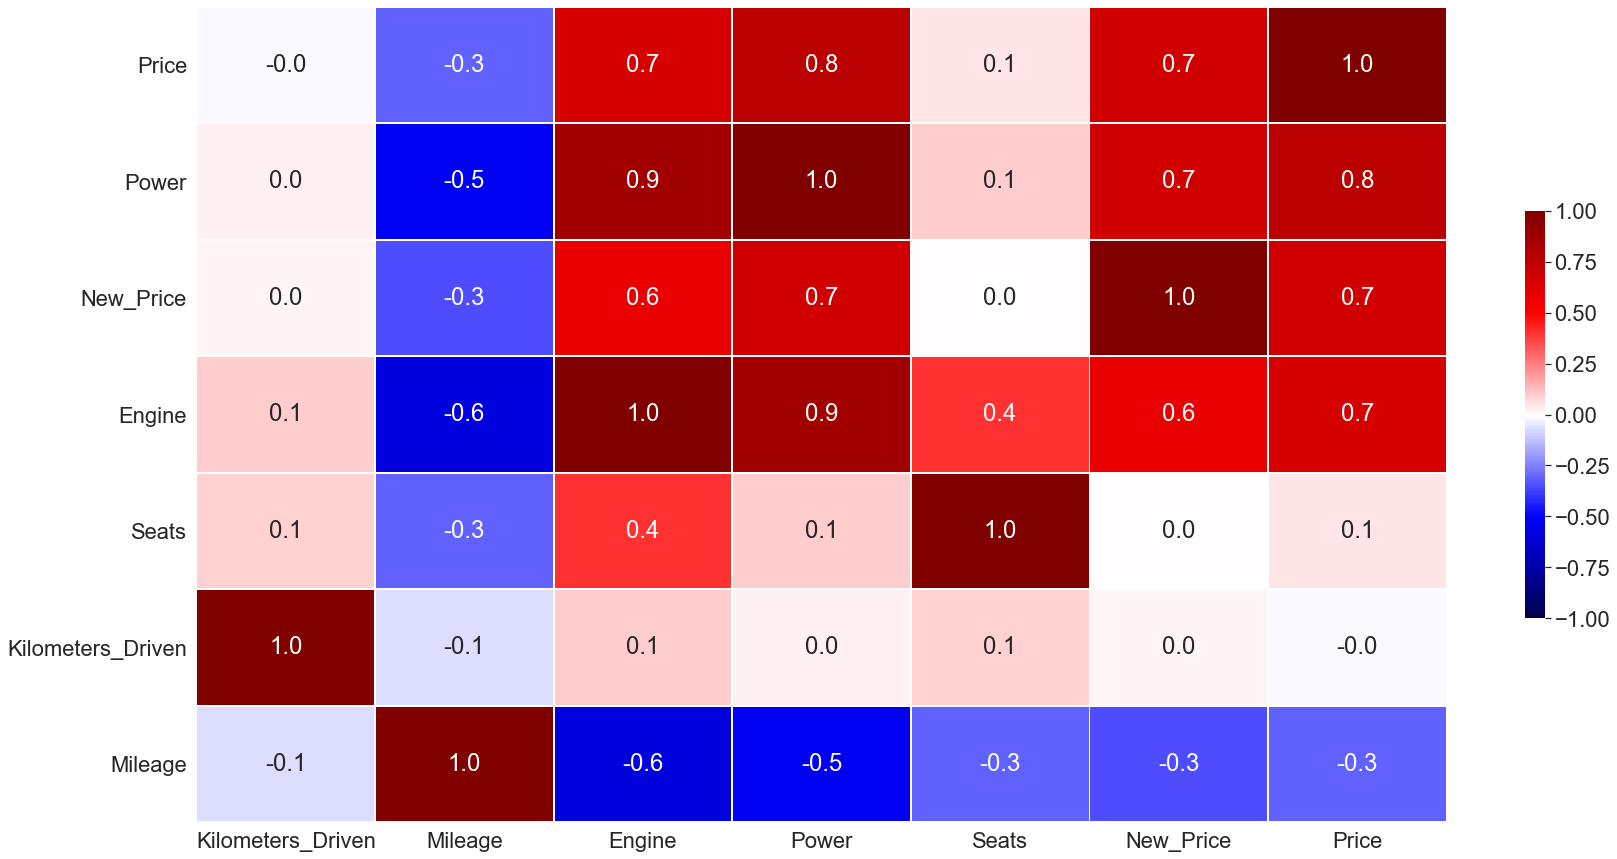

In [458]:
# Look at Correlations for used cars characteristics

numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Year")         # dropping year column as it is temporal variable
corr = (
    cars[numeric_columns].corr().sort_values(by=["Price"], ascending=False)
)                                      # sorting correlations w.r.t Price

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap="seismic",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

**Observations:**
- There is a high correlation between Price and Power and Engine.
- Price does not correlate with kilometers driven, seats, or mileage.
- Both Seats and Kilometers driven are not correlated with any other variables in this list.

Next let's look at the highly correlated variables.

<AxesSubplot:xlabel='Power', ylabel='Price'>

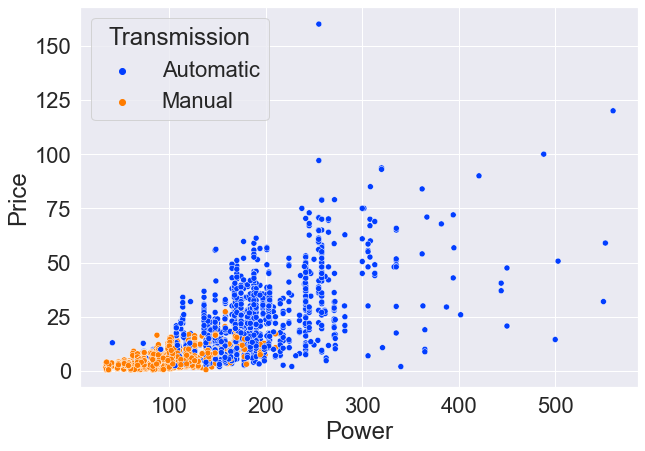

In [459]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Price", x="Power", hue="Transmission", data=cars, palette='bright')

<AxesSubplot:xlabel='Power', ylabel='Price'>

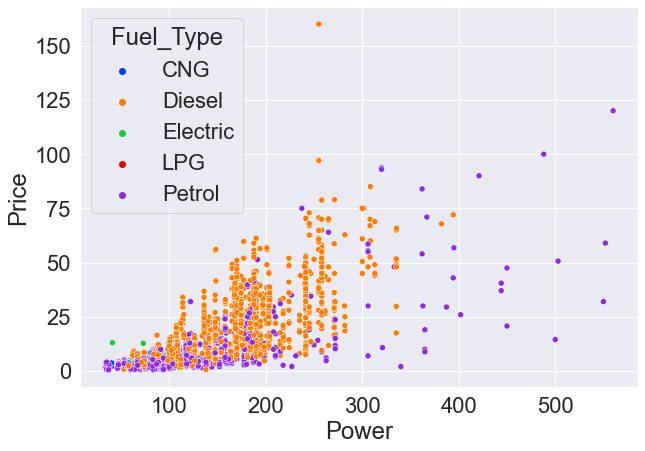

In [460]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Price", x="Power", hue="Fuel_Type", data=cars, palette='bright')

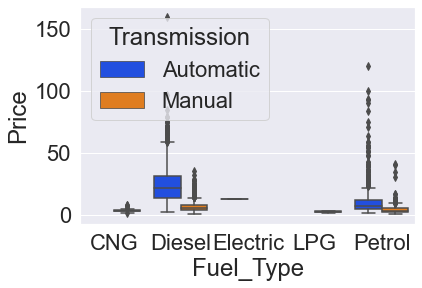

In [461]:
#Box plots to show relationship of Education, Product type, Fitness, and Marital Status
sns.boxplot(data=cars,y='Price',x='Fuel_Type',hue='Transmission', palette='bright');

<AxesSubplot:xlabel='Engine', ylabel='Price'>

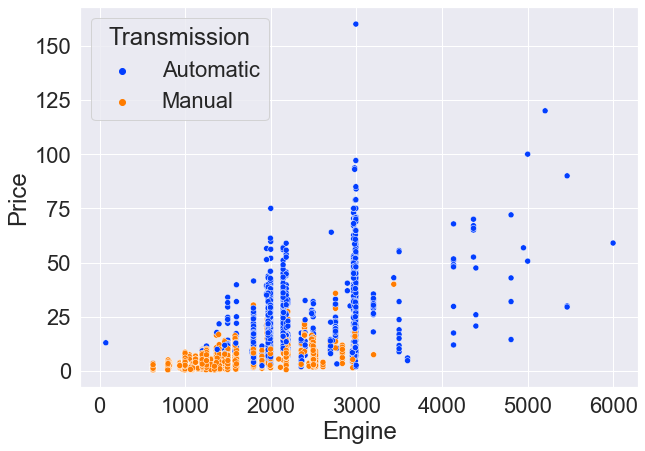

In [462]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Price", x="Engine", hue="Transmission", data=cars, palette='bright')

<AxesSubplot:xlabel='Engine', ylabel='Price'>

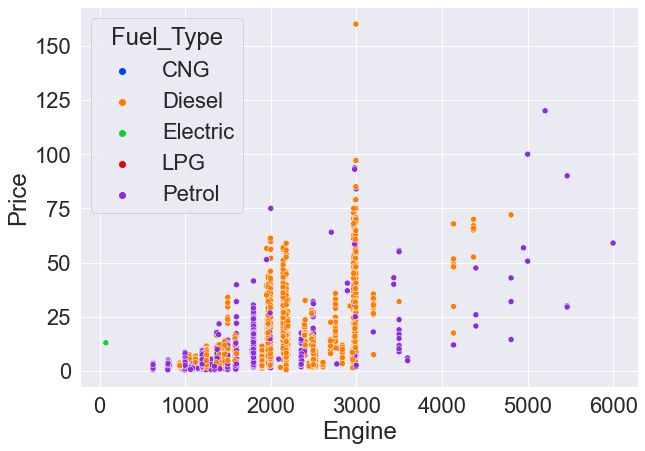

In [463]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Price", x="Engine", hue="Fuel_Type", data=cars, palette='bright')

**Observations:**
- Most cars appear to be either Diesel or Petrol fuel types
- Automatic transmission vehicles have a larger Price range than Manual transmission vehicles.

Next let's look at the Price over the years.

<AxesSubplot:xlabel='Year', ylabel='Price'>

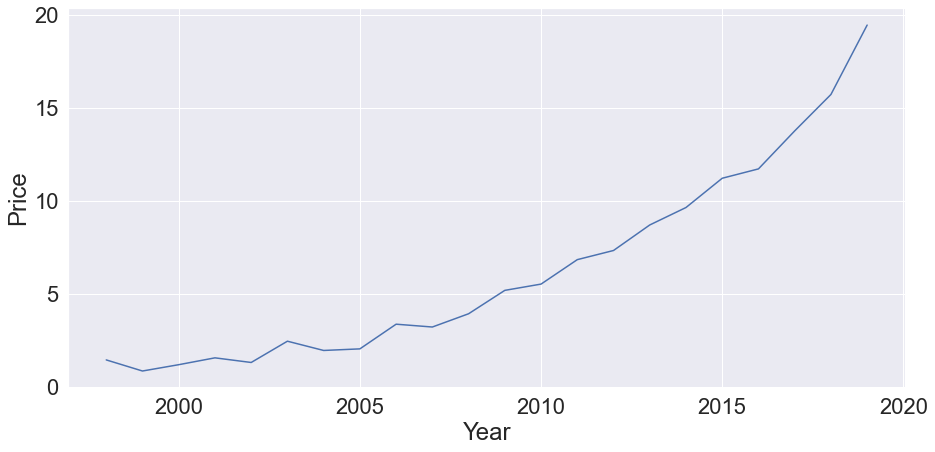

In [464]:
# Average Price over the years
plt.figure(figsize=(15, 7))
sns.lineplot(x="Year", y="Price", data=cars, ci=None)

**Observation:**

The average price of used cars has increased over the years.

**Price vs Location**

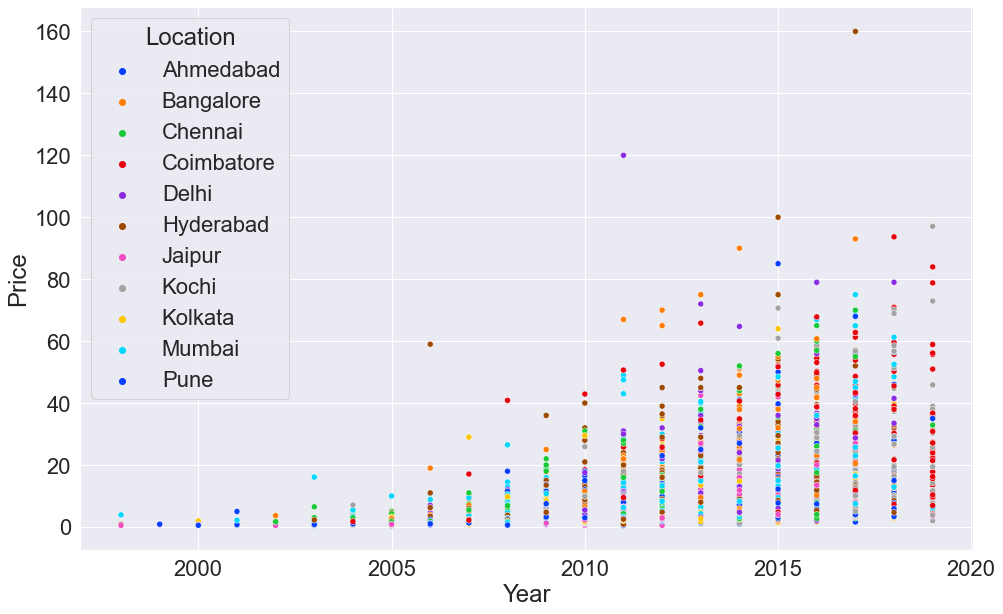

In [465]:
plt.figure(figsize=(16, 10))
sns.scatterplot(y="Price", x="Year", hue="Location", data=cars, palette='bright');

**Observartions:**

- Looking at a scatter plot of price along the years and by Location, there are a few outliers in the dependent variable - Price.

- There does not appear to be a relationship between Price and Location.


## Missing Values

In [466]:
# Which columns have missing values?
cars.isnull().sum() 

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Make                    0
Model                   0
dtype: int64

**Observations:**

- There are 1234 rows missing the Price variable. These will be dropped for analysis.
- There are 7253 rows and New_Price is missing 6247 values - 86% of the data is missing. This New_Price variable will be dropped since it does not have any input value to the model.


Next let's check if columns are missing the same number of values or not

In [467]:
# Count the number of missing values per row
num_missing = cars.isnull().sum(axis=1)
num_missing.value_counts()

1    5232
2    1125
0     823
4      36
3      27
5      10
dtype: int64

In [468]:
# Set up a loop to sum and printout the Variables missing the same number of values
for n in num_missing.value_counts().sort_index().index:
    if n > 0:                                                   # set up n to be the number of missing values
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = cars[num_missing == n].isnull().sum()  # for a specific n, sum up the number of nulls for each variable
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')
        

For the rows with exactly 1 missing values, NAs are found in:
Mileage         1
New_Price    5049
Price         182
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Mileage         1
Power         103
Seats           2
New_Price    1125
Price        1019
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Power        26
Seats         5
New_Price    27
Price        23
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Engine       36
Power        36
Seats        36
New_Price    36
dtype: int64



For the rows with exactly 5 missing values, NAs are found in:
Engine       10
Power        10
Seats        10
New_Price    10
Price        10
dtype: int64





**Observation:**

- There appears to be some structure to the missing values found in this data. For instance 36 rows are all missing Engine, Power, Seats, and New Price. Also 10 rows are missing Engine, Power, Seats, New_Price, and Price.

Since Price is the dependent variable, let's drop the rows missing the Price value.

### Drop rows missing the dependent variable Price

In [469]:
cars.Price.isna().value_counts()

False    6019
True     1234
Name: Price, dtype: int64

In [470]:
# confirm length if we dropped only the Price is NaN rows
len(cars.dropna(subset=['Price']))

6019

In [471]:
# Remove rows with Price as NaN
cars.dropna(subset=['Price'],inplace=True)

In [472]:
# Confirm the variable summary
cars.describe(include="all")

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model
count,6019,6019.000000,6.019000e+03,6019,6019,6019,6017.000000,5983.000000,5876.000000,5977.000000,824.000000,6019.000000,6019,6019
unique,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,31,1876
top,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,Maruti,XUV500 W8 2WD
freq,790,NaN,NaN,3205,4299,4929,NaN,NaN,NaN,NaN,NaN,NaN,1211,49
mean,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,18.134961,1621.276450,113.253050,5.278735,20.320716,9.479468,NaN,NaN
std,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,4.582289,601.355233,53.874957,0.808840,20.198119,11.187917,NaN,NaN
min,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,1.000000,0.440000,NaN,NaN
25%,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,75.000000,5.000000,7.845000,3.500000,NaN,NaN
50%,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,18.150000,1493.000000,97.700000,5.000000,11.415000,5.640000,NaN,NaN
75%,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1984.000000,138.100000,5.000000,24.010000,9.950000,NaN,NaN


In [473]:
# Again Which columns have missing values?
cars.isnull().sum() 

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
Make                    0
Model                   0
dtype: int64

### Drop Rows missing New_Price
Now it looks like New_Price has the most missing values, too many to be of value for modeling. So we'll drop that column next.

In [474]:
# Dropping the New_Price column due to a large number of missing values.
cars.drop(['New_Price'], axis=1, inplace=True)

In [475]:
# Again Which columns have missing values?
cars.isnull().sum() 

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Make                   0
Model                  0
dtype: int64

**Observations:**

- So now Power has the most missing values, followed by Seats, Engine, and then Mileage.
- Only numerical varialbles have missing values.

### Work on Missing values for Seats, Engine, and Mileage

In [476]:
# Count the number of missing values per row
num_missing = cars.isnull().sum(axis=1)
num_missing.value_counts()

0    5872
1     107
3      36
2       4
dtype: int64

In [477]:
# Set up a loop to sum and printout the Variables missing the same number of values
for n in num_missing.value_counts().sort_index().index:
    if n > 0:                                                   # set up n to be the number of missing values
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = cars[num_missing == n].isnull().sum()  # for a specific n, sum up the number of nulls for each variable
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')
        

For the rows with exactly 1 missing values, NAs are found in:
Mileage      2
Power      103
Seats        2
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Power    4
Seats    4
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Engine    36
Power     36
Seats     36
dtype: int64





### Fill in missing data with standard value

In [478]:
# NaNs are floats so they become strings here
# we also need this to be strings because we're adding a category that's not present
#cars[''] = cars[''].astype(str).replace('nan', 'is_missing').astype('category')

In [479]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

temp_cars = pd.DataFrame(cars['Power'])

In [480]:
temp_cars

,Power
S.No.,
0,58.16
1,126.20
2,88.70
3,88.76
4,140.80
...,...
6014,74.00
6015,71.00
6016,112.00


In [481]:
# Fill in Numeric columns 
print('# of Null values before imputation',cars['Power'].isnull().sum())

# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=2)
temp_cars['Power'] = pd.DataFrame(imputer.fit_transform(cars[['Power']]))

# print dataset after performing the operation
temp_cars
print('# of Null values afterimputation', temp_cars['Power'].isnull().sum())


# of Null values before imputation 143
# of Null values afterimputation 0


In [482]:
cars['Power'] = temp_cars['Power']  # Re-assign the imputed values to the dataframe
cars.head()     # QC head of the dataframe

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make,Model
S.No.,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [483]:
# Check number of null values
print('# of Null values after imputation',cars['Power'].isnull().sum())

# of Null values after imputation 0


In [484]:
# delete temporary dataframe
del temp_cars

In [485]:
# Again Which columns have missing values?
cars.isnull().sum() 

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                 0
Seats                42
Price                 0
Make                  0
Model                 0
dtype: int64

In [486]:
# Count the number of missing values per row
num_missing = cars.isnull().sum(axis=1)
num_missing.value_counts()

0    5975
2      36
1       8
dtype: int64

There is not a strong correlation between Seats and Price, but there is a correlation between Engine and Price. To utilize the Engine values, we will impute the seats for these rows.

In [487]:
# Fill in Numeric columns 
print('# of Null values before imputation',cars['Seats'].isnull().sum())
temp_cars=pd.DataFrame(cars['Seats'])
#temp_cars['Seats'] = cars['Seats']
temp_cars['Seats'] = pd.DataFrame(imputer.fit_transform(cars[['Seats']]))
temp_cars['Seats']

# of Null values before imputation 42


S.No.
0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
6014    5.0
6015    5.0
6016    8.0
6017    5.0
6018    5.0
Name: Seats, Length: 6019, dtype: float64

In [488]:
# Confirm the number of null values in Seats
temp_cars['Seats'].isnull().sum()

0

In [489]:
print('No of unique seat #s',temp_cars['Seats'].nunique())
print('The Seat count values are:',temp_cars['Seats'].unique())

No of unique seat #s 10
The Seat count values are: [ 5.          7.          8.          4.          6.          2.
  5.27873515 10.          9.          0.        ]


It looks like the imputed Seat count value is a float number. This should be converted to integer to match the other values.

In [490]:
#temp_cars.info()
#temp_cars['Seats'] = temp_cars['Seats'].astype('Int64')
temp_cars['Seats'] = temp_cars['Seats'].astype(np.int64)

In [491]:
#Confirm dataset type
temp_cars[['Seats']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Seats   6019 non-null   int64
dtypes: int64(1)
memory usage: 94.0 KB


In [492]:
# Confirm number of Seats values is again 9
temp_cars.nunique()

Seats    9
dtype: int64

In [493]:
# Reassign the Seats values and delete the temporary dataframe
cars['Seats'] = temp_cars['Seats']
cars.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make,Model
S.No.,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,Audi,A4 New 2.0 TDI Multitronic


In [494]:
# Check number of null values
print('# of Null values after imputation',cars['Seats'].isnull().sum())

# of Null values after imputation 0


In [495]:
# Again Which columns have missing values?
cars.isnull().sum() 

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                 0
Seats                 0
Price                 0
Make                  0
Model                 0
dtype: int64

There is a correlation between Price and Engine, but not Price and Mileage. We will impute the missing Engine values, but drop the 2 rows missing Mileage values.

In [496]:
# Fill in Numeric columns 
print('# of Null values before imputation',cars['Engine'].isnull().sum())
temp_cars['Engine'] = cars['Engine']
temp_cars['Engine'] = pd.DataFrame(imputer.fit_transform(cars[['Engine']]))
temp_cars['Engine']

# of Null values before imputation 36


S.No.
0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 6019, dtype: float64

In [497]:
# Confirm the number of null values in Engine
temp_cars['Engine'].isnull().sum()

0

In [498]:
print('No of unique Engine #s',temp_cars['Engine'].nunique())

No of unique Engine #s 147


In [499]:
#temp_cars.info()
temp_cars.drop(['Seats'], axis=1, inplace=True)

In [500]:
temp_cars.head()
temp_cars['Engine'].astype(np.int64)

S.No.
0        998
1       1582
2       1199
3       1248
4       1968
        ... 
6014    1248
6015    1120
6016    2498
6017     998
6018     936
Name: Engine, Length: 6019, dtype: int64

In [501]:
temp_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Engine  6019 non-null   float64
dtypes: float64(1)
memory usage: 94.0 KB


In [502]:
cars['Engine']=temp_cars['Engine']
cars.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make,Model
S.No.,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,Audi,A4 New 2.0 TDI Multitronic


In [503]:
# Again Which columns have missing values?
cars.isnull().sum() 

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
Make                 0
Model                0
dtype: int64

In [504]:
# Next we will drop the two rows containing missing Mileage
# Remove rows with Mileage as NaN
cars.dropna(subset=['Mileage'],inplace=True)
cars.describe(include='all')

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make,Model
count,6017,6017.000000,6.017000e+03,6017,6017,6017,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017,6017
unique,11,NaN,NaN,4,2,4,NaN,NaN,NaN,NaN,NaN,31,1874
top,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,Maruti,XUV500 W8 2WD
freq,789,NaN,NaN,3205,4299,4927,NaN,NaN,NaN,NaN,NaN,1211,49
mean,NaN,2013.358152,5.874228e+04,NaN,NaN,NaN,18.134961,1621.504562,113.271748,5.276882,9.478340,NaN,NaN
std,NaN,3.269967,9.128375e+04,NaN,NaN,NaN,4.582289,599.316375,53.229184,0.806464,11.189605,NaN,NaN
min,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,624.000000,34.200000,0.000000,0.440000,NaN,NaN
25%,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,78.000000,5.000000,3.500000,NaN,NaN
50%,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,18.150000,1493.000000,98.600000,5.000000,5.640000,NaN,NaN
75%,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1969.000000,138.030000,5.000000,9.950000,NaN,NaN


In [505]:
# Again Which columns have missing values?
cars.isnull().sum() 
#del temp_cars    #  Un-comment this to delete this temporary dataframe

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Make                 0
Model                0
dtype: int64

Now there are 6017 rows and no Null values.

## Feature Engineering

### Outliers

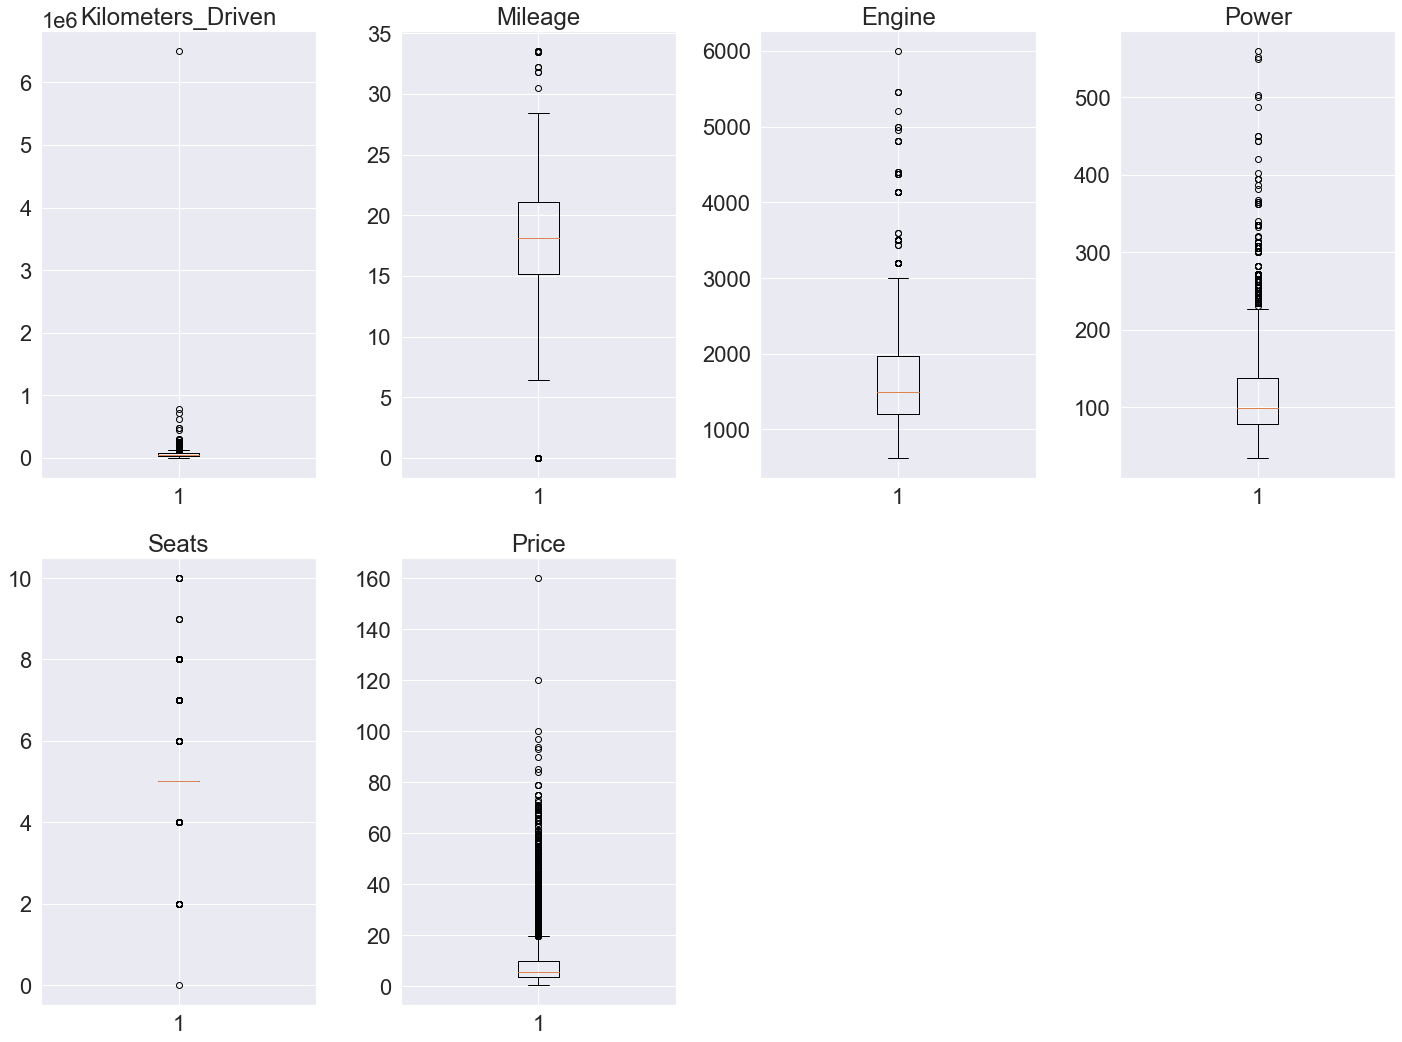

In [506]:
# Create boxplots to check for outliers in Numeric Variables
numeric_columns.remove("New_Price")         # dropping New_Price column since it is missing >50% of the values


plt.figure(figsize=(20, 15))

for i, variable in enumerate(numeric_columns):  # Add a counter to Numeric columns
    plt.subplot(2, 4, i + 1)
    plt.boxplot(cars[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are lower outliers in *Mileage* and *Seats*.


- All numerical columns have upper outliers.

- These outliers will be treated since they might adversely affect the predictive power of linear model. They may however be due to non-linear pattern in the data or can be important information.

- Treating outliers for Seats will remove all of the values. This will not be included in outlier treatment.

- Since outliers in the independent variable can adversely impact the linear model, this will be checked by building the model with and without outliers to compare the model performances.

### Outlier Treatment

In [507]:
# Treat outliers by Flooring and Capping
def treat_outliers(df, col):  # for one column
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # ALL values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # ALL values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):   # For all columns
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [508]:
# Make a copy dataset to apply outlier treatment
clean_df=cars.copy()
clean_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make,Model
S.No.,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,Audi,A4 New 2.0 TDI Multitronic


In [509]:
numerical_col = clean_df.select_dtypes(include=np.number).columns.tolist()
numerical_col.remove("Seats")         # dropping Seats column due to data distribution

clean_df = treat_outliers_all(clean_df, numerical_col)

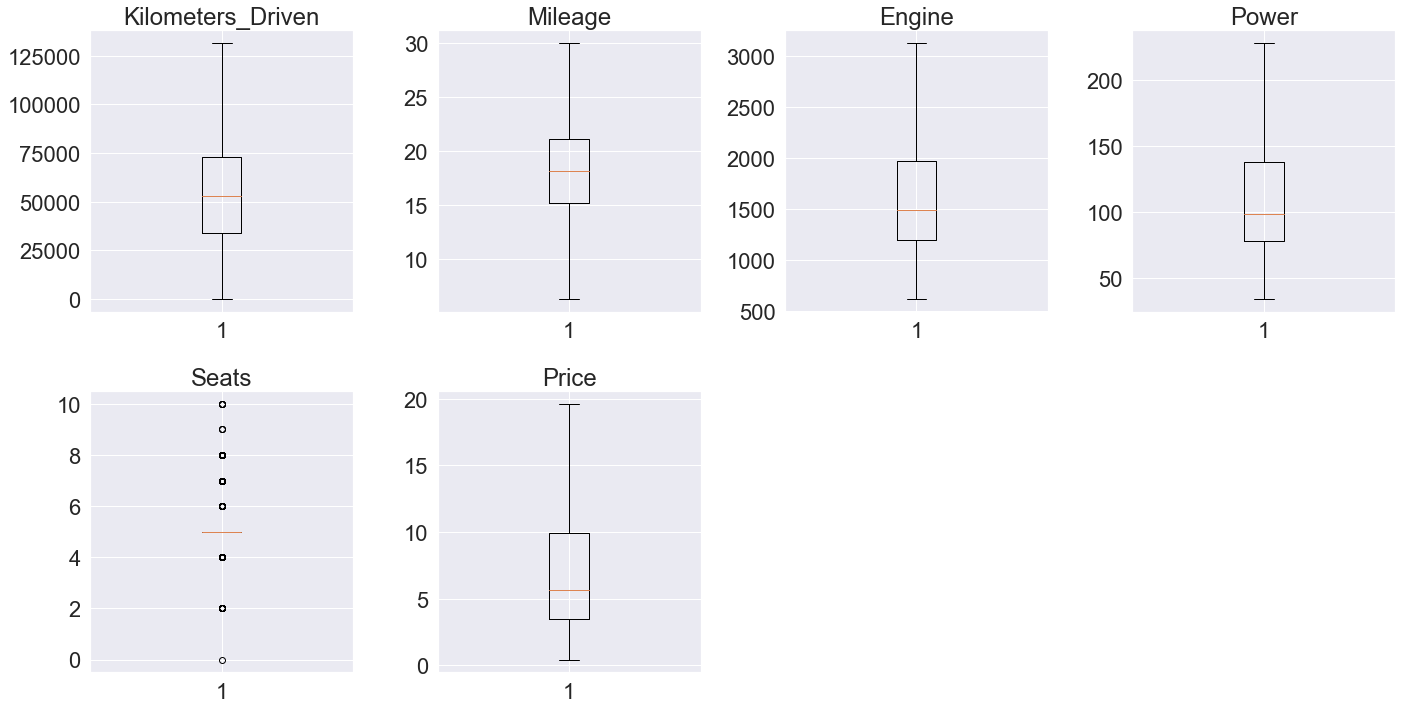

In [510]:
# Create boxplots to check for outliers in Numeric Variables
plt.figure(figsize=(20, 25))

for i, variable in enumerate(numeric_columns):   # Add a counter to Numeric columns
    plt.subplot(5, 4, i + 1)
    plt.boxplot(clean_df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Outliers have been removed.

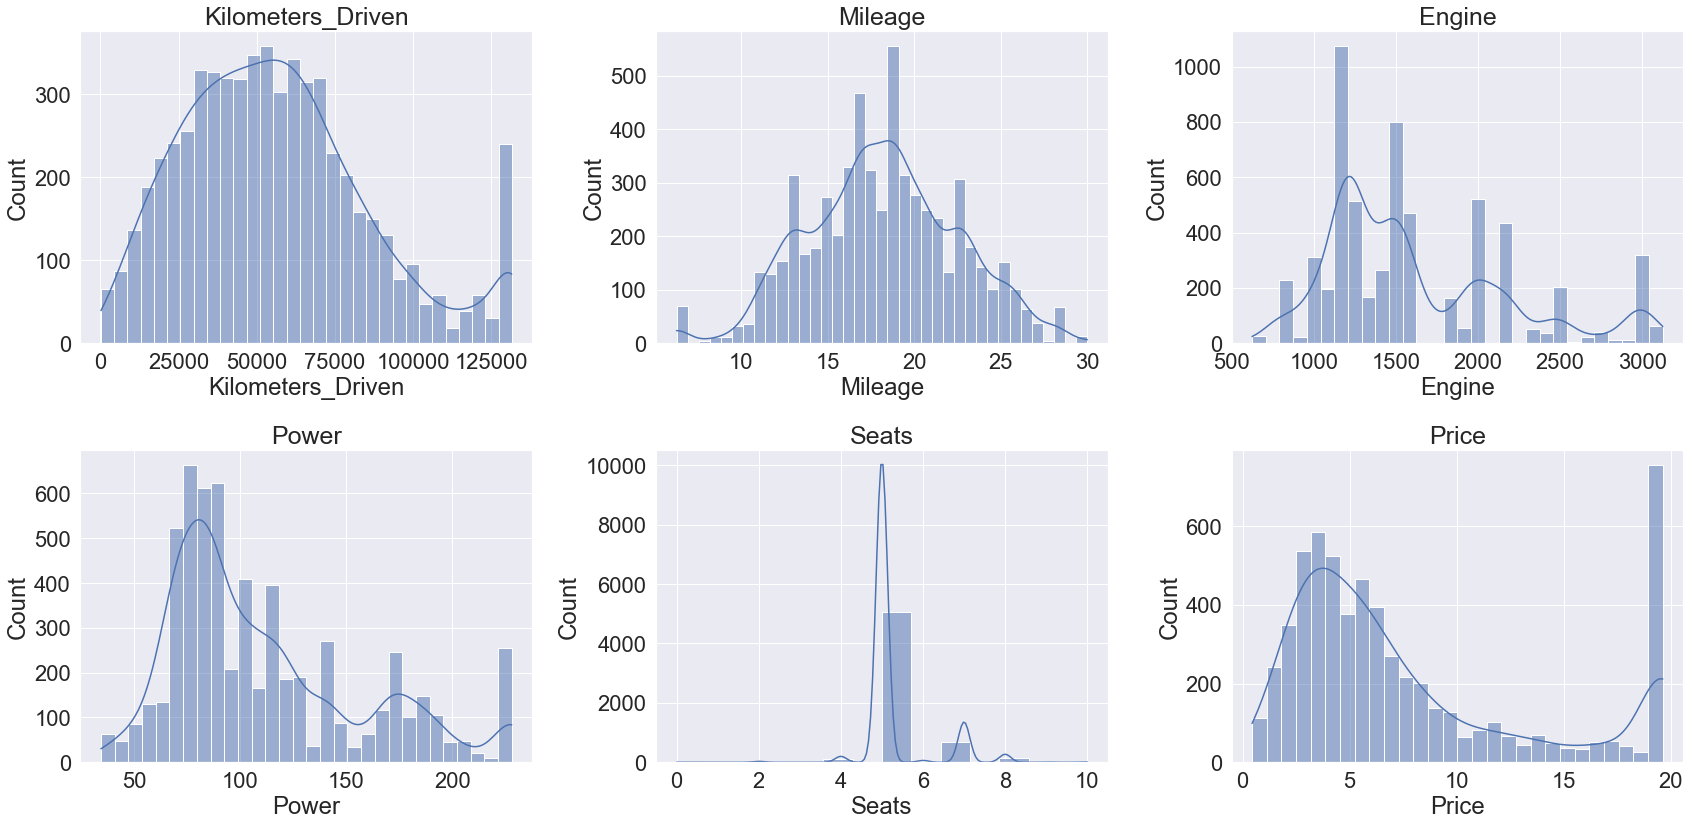

In [511]:
# QC the distribution plots after the outlier treatment

all_col2 = clean_df.select_dtypes(include=np.number).columns.tolist()  # create a list of the numeric columns
all_col2.remove("Year")                      # remove the year from the numeric column list
plt.figure(figsize=(24, 12))

for i in range(len(all_col2)):                # create a subplot for display of distributions
    plt.subplot(2, 3, i + 1)
    #plt.hist(cars[all_col[i]])               # without distribution (kde) curves
    sns.histplot(clean_df[all_col2[i]], kde=True)  # with distribution (kde) curves
    plt.tight_layout()
    plt.title(all_col2[i], fontsize=25)

plt.show()

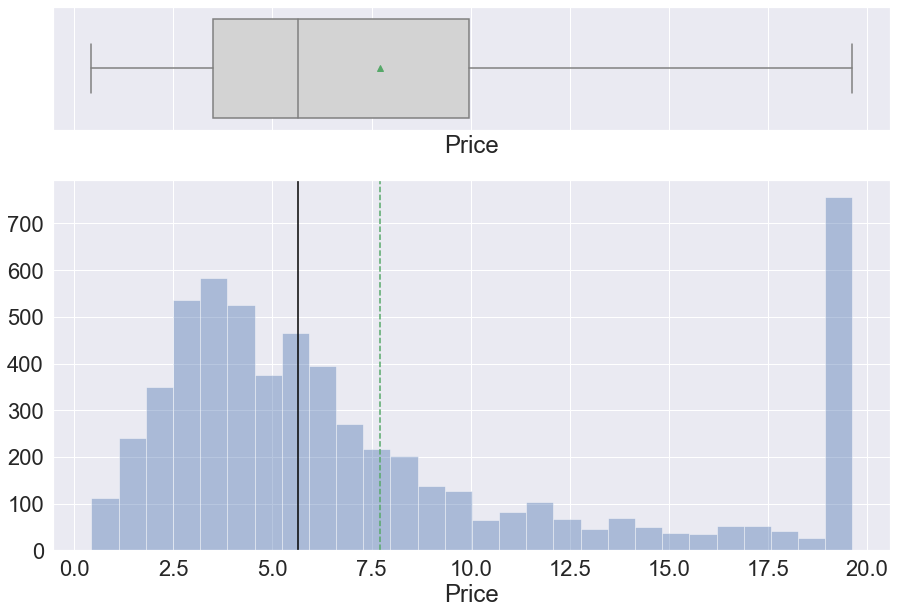

In [512]:
# Let's confirm an independent variable - Price
histogram_boxplot(clean_df.Price)

**Observations:**

- Kilometers_Driven and Mileage have normal distributions.
- Engine, Power, and Price have right skewed distributions.
- The Price distribution contains a spike on the tail end. This may be due to spurious data and will be investigated later.

## Data Preparation for Modeling

### Drop Un-necessary Columns

In [513]:
# Dropping the Seats and Model column due to complexity of naming.
clean_df.drop(['Seats','Model'], axis=1, inplace=True)

clean_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Make
S.No.,,,,,,,,,,,
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,Maruti
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,Hyundai
2,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,Honda
3,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,Maruti
4,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74,Audi


### Encoding Categorical Columns

In [514]:
# Define X and y variables - independent and dependent variables
X = clean_df.drop(["Price"], axis=1)  # Price is dropped since it is the dependent variable
y = clean_df[["Price"]]  # double bracketts for dataframe

print(X.head())
print(y.head())

         Location    Year  Kilometers_Driven Fuel_Type Transmission  \
S.No.                                                                 
0          Mumbai  2010.0              72000       CNG       Manual   
1            Pune  2015.0              41000    Diesel       Manual   
2         Chennai  2011.0              46000    Petrol       Manual   
3         Chennai  2012.0              87000    Diesel       Manual   
4      Coimbatore  2013.0              40670    Diesel    Automatic   

      Owner_Type  Mileage  Engine   Power     Make  
S.No.                                               
0          First    26.60   998.0   58.16   Maruti  
1          First    19.67  1582.0  126.20  Hyundai  
2          First    18.20  1199.0   88.70    Honda  
3          First    20.77  1248.0   88.76   Maruti  
4         Second    15.20  1968.0  140.80     Audi  
       Price
S.No.       
0       1.75
1      12.50
2       4.50
3       6.00
4      17.74


In [515]:
# Confirm shape of each dataframe
print(X.shape)
print(y.shape)

(6017, 10)
(6017, 1)


In [516]:
# Encode categorical variables  Owner_Type, Location, Fuel_Type, Make, and Transmission
X = pd.get_dummies(X, columns=["Transmission", "Location", "Fuel_Type", "Owner_Type", "Make"], drop_first=True)
X.head()   # QC output of dummy variables

,Year,Kilometers_Driven,Mileage,Engine,Power,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,72000,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015.0,41000,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011.0,46000,18.20,1199.0,88.70,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012.0,87000,20.77,1248.0,88.76,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013.0,40670,15.20,1968.0,140.80,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Create Training and Testing datasets

In [517]:
# Create the training and testing dataframes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [518]:
X_train.head()    # Look at the first few rows of the training independent variables

,Year,Kilometers_Driven,Mileage,Engine,Power,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
841,2014.0,84000,19.30,1968.0,141.00,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3378,2017.0,42883,19.81,1086.0,68.05,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1189,2014.0,30000,16.80,1497.0,116.30,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
175,2013.0,21000,14.40,1598.0,103.60,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4748,2019.0,16698,23.84,1199.0,84.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Build Linear Regression Model

In [519]:
# Fit the linear regression model on the training dataset (70% of the whole data)

linearregression = LinearRegression() # Initiate a class, create a new variable as an alias for this class
linearregression.fit(X_train, y_train) # Fit is training the dataset - learn what is in the data

LinearRegression()

### Evaluate the Model

In [520]:
# QC the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,5.851486e-01
Kilometers_Driven,-1.340752e-05
Mileage,-1.400079e-01
Engine,8.580131e-04
Power,3.850766e-02
Transmission_Manual,-1.046495e+00
Location_Bangalore,8.208912e-01
Location_Chennai,2.487707e-01
Location_Coimbatore,6.770376e-01
Location_Delhi,-5.072489e-01


In [521]:
# Make predictions on the test set
pred = linearregression.predict(X_test)

df = pd.DataFrame({"Actual": y_test.values.flatten(), "Predicted": pred.flatten()}) # Create new dataframe for the actual values and the predicted values
df

,Actual,Predicted
0,5.750,5.506783
1,5.750,6.699355
2,8.000,6.798860
3,5.900,4.981928
4,3.810,4.517074
...,...,...
1801,7.830,8.598694
1802,5.110,4.780616
1803,4.310,5.793383
1804,19.625,20.180248


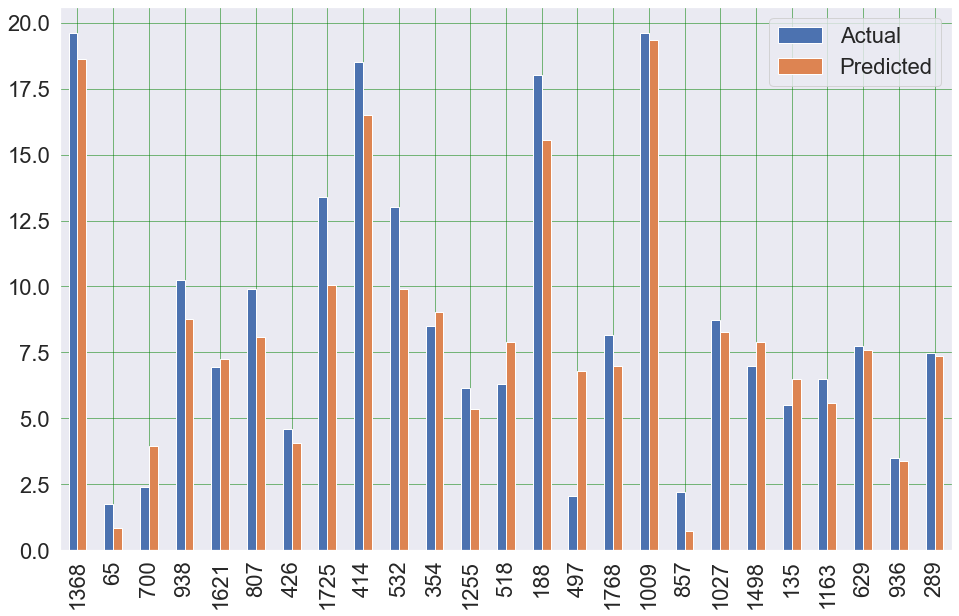

In [522]:
np.random.seed(42)     # Lets look at a sample of test data and plot the Actual vs Predicted Results
df1 = df.sample(25)
df1.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

**Observations:**

- The actual and predicted values appear similar, but could be better matched.

### Check Performance of Model

This will be done using **MAE, MAPE, RMSE, $R^2$**:

* Use metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* Define a function to calculate MAPE.
* Create a function which will print out all the above metrics in one go.

In [523]:
# Define function for MAPE
def mape(targets, predictions):  # mean absolute percentage error
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# Define common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [524]:
# Check Model performance on Training dataset (seen 70% data)

print("Train Performance\n")
model_perf(linearregression, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.321721,28.293991,1.796986,0.901668


In [525]:
# Check Model performance on Testing dataset (unseen 30% data)

print("Test Performance\n")
model_perf(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,1.402397,31.137592,1.959604,0.888137


**Observations**

- The training and testing scores are 90% and 88% respectively, and are comparable. Therefore, the model is a good fit.

- $R^2$ is 0.888 on the test set, i.e., the model explains 88.8% of total variation in the test dataset. The model is satisfactory.

- MAE indicates that our current model is able to predict Price within a mean error of 1.3 years on the test data.

- **MAPE** on the test set suggests we can predict within **28%** of the Price. This needs to be investigated - there may be still some extreme values in the data or values equal to 0.

## Linear Regression Using StatsModel

In [526]:
# Build linear regression model using Statsmodel

import statsmodels.api as sm

# Unlike sklearn, Statsmodels does not add a constant to the data, so it must be added manually

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod0 = sm.OLS(y_train, X_train1)   # Build model
olsres0 = olsmod0.fit()
print(olsres0.summary())   # Print out Regression results summary

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     778.7
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:33:29   Log-Likelihood:                -8443.3
No. Observations:                4211   AIC:                         1.699e+04
Df Residuals:                    4161   BIC:                         1.730e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations:**

- **Adjusted. $R^2$**: It reflects the fit of the model.
    - Adjusted $R^2$ values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - Here the value for Adj. $R^2$ is **0.901**


- ***const* coefficient**: It is the Y-intercept.
    - It means that if all the dependent variable (features like *Country*, *Status*, *Adult_Mortality* and so on) coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for *const* coefficient is **-1130.28**
- Negative values of the coefficient show that *Price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *Price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

## Check Linear Regression Assumptions

**1. No Multicollinearity**

**2. Mean of residuals should be 0**

**3. No Heteroscedasticity**

**4. Linearity of variables**

**5. Normality of error terms**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* **General Rule of thumb**: If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all. Whereas, if VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity, and if it is 10 or exceeding 10, it shows signs of high multicollinearity.

In [527]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                        858038.528099
Year                              2.185012
Kilometers_Driven                 1.950226
Mileage                           3.554736
Engine                            8.544106
Power                             7.934786
Transmission_Manual               2.324111
Location_Bangalore                2.485808
Location_Chennai                  3.012686
Location_Coimbatore               3.539832
Location_Delhi                    3.180137
Location_Hyderabad                3.847341
Location_Jaipur                   2.703681
Location_Kochi                    3.589415
Location_Kolkata                  3.151219
Location_Mumbai                   4.010915
Location_Pune                     3.459384
Fuel_Type_Diesel                 28.747016
Fuel_Type_Electric                     NaN
Fuel_Type_LPG                     1.195326
Fuel_Type_Petrol                 29.354921
Owner_Type_Fourth & Above         1.015726
Owner_Type_Second                 1.1801

- There are only there variables (categorical) witn NaN for the VIFs:  Fuel_Type_Electric, Make_Hindustan, and Make_OpelCorsa.
- The largest VIFs are found under the Make (Brand) dummy variables.
- The Fuel_Type_Diesel and Fuel_Type_Petrol have similar large VIFs.
- The Engine and Power VIFs are similarly high, but do not exceed the 10 cutoff.
- The Location dummy variables have low VIFs.


### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has VIF score greater than 5.
2. Look at the adjusted R-squared of all these models.
3. Drop the variable that makes least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

In [528]:
# Drop the one variable with the highest VIF value and check the adjusted R-squared
X_train2 = X_train1.drop("Engine", axis=1)   # Create new training dataset without this variable
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series2))

VIF Scores: 

const                         0.000000
Year                          2.152832
Kilometers_Driven             1.952753
Mileage                       3.061787
Power                         4.810194
Transmission_Manual           2.316760
Location_Bangalore            2.588552
Location_Chennai              3.091506
Location_Coimbatore           3.699838
Location_Delhi                3.279496
Location_Hyderabad            3.883967
Location_Jaipur               2.716845
Location_Kochi                3.679412
Location_Kolkata              3.233247
Location_Mumbai               4.049012
Location_Pune                 3.580361
Fuel_Type_Diesel             30.487963
Fuel_Type_Electric                 NaN
Fuel_Type_LPG                 1.265169
Fuel_Type_Petrol             30.919911
Owner_Type_Fourth & Above     1.011859
Owner_Type_Second             1.172555
Owner_Type_Third              1.130554
Make_Audi                          inf
Make_BMW                           inf
Make_Bentle

This has decreased some VIFs, but mostly increased other VIFs. The Vifs of the Make variables are now Infinite.

In [529]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     787.7
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:33:32   Log-Likelihood:                -8461.0
No. Observations:                4211   AIC:                         1.702e+04
Df Residuals:                    4162   BIC:                         1.733e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [530]:
# Drop the other variable with the highest VIF value and check the adjusted R-squared
X_train3 = X_train1.drop("Power", axis=1)  # Create new training dataset without this variable
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series3))

VIF Scores: 

const                         0.000000
Year                          2.127032
Kilometers_Driven             1.956070
Mileage                       3.680430
Engine                        5.281782
Transmission_Manual           2.218426
Location_Bangalore            2.588490
Location_Chennai              3.091583
Location_Coimbatore           3.699939
Location_Delhi                3.277365
Location_Hyderabad            3.883499
Location_Jaipur               2.715564
Location_Kochi                3.679384
Location_Kolkata              3.232455
Location_Mumbai               4.049684
Location_Pune                 3.580387
Fuel_Type_Diesel             30.493251
Fuel_Type_Electric                 NaN
Fuel_Type_LPG                 1.267012
Fuel_Type_Petrol             31.308592
Owner_Type_Fourth & Above     1.012153
Owner_Type_Second             1.172569
Owner_Type_Third              1.130589
Make_Audi                          inf
Make_BMW                           inf
Make_Bentle

Again this has decreased some VIFs, but increased other VIFs. The Vifs of the Make variables are now Infinite.

In [531]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     700.0
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:33:33   Log-Likelihood:                -8683.6
No. Observations:                4211   AIC:                         1.747e+04
Df Residuals:                    4162   BIC:                         1.778e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations:**
- The test of dropping Engine or Power and analyzing VIFs shows a good correlation between these two independent variables. One of the variables needs to be dropped.
- The Adjust R-squared is largerer when deleting the Engine variable from the training dataset. So, this variable will be deleted and modeling will use olsmod1.
- Looking at the P values for the olsmod1, there are high values for the Owner_Type, Make, and Location variables. But not all of the dummy variables have high P values. So there is some significance to these variables.
- The Make_Smart variable does not have any values listed in the Regression Summary. This will be investigated - it is possible that the Smart Brand could be dropped from input since it does not contain valuable information?
- Or are there still some outliers in the dependant variable Price that have a negative impact on the Linear Model?

### Investigate the Dependent Variable - Price -----------------------------------------------------------------------------------------------

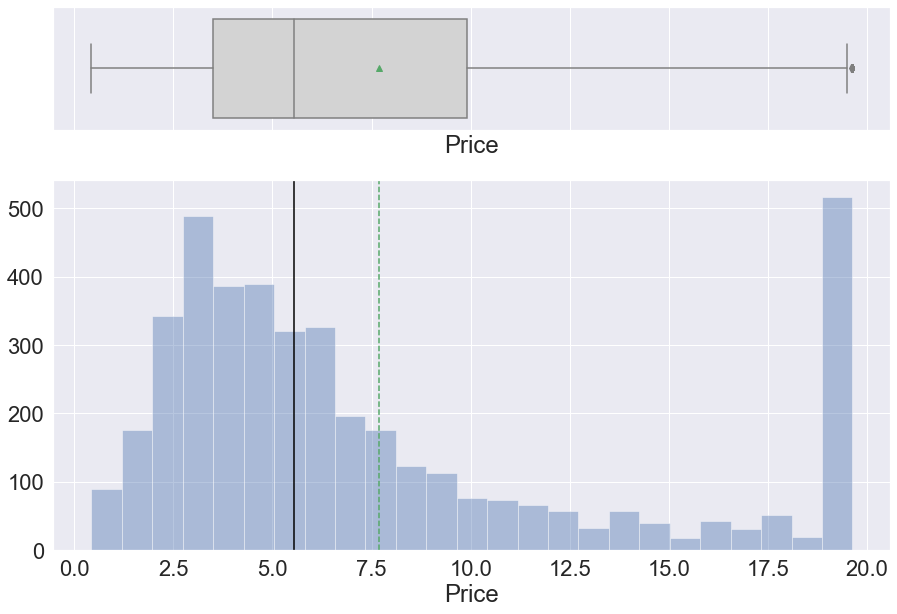

In [532]:
# QC dependent variable - Price in the training dataset
histogram_boxplot(y_train.Price)

<AxesSubplot:ylabel='Count'>

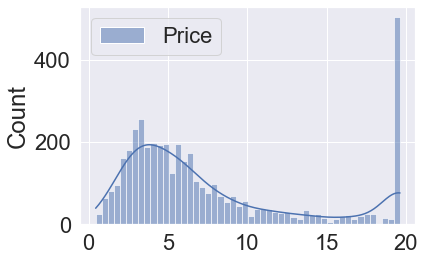

In [533]:
# Check the distribustion with a higher bin count
sns.histplot(y_train, kde=True,bins=50)

In [534]:
y_train.max()

Price    19.625
dtype: float64

- The Boxplot shows outliers above the upper whisker associated with the spike near 20Lakhs.
- Another outlier treatment is needed on the data that went into Training and Testing datasets.

In [535]:
# Make a copy dataset to apply outlier treatment
clean_df2 = clean_df.copy()
clean_df2.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Make
S.No.,,,,,,,,,,,
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,Maruti
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,Hyundai
2,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,Honda
3,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,Maruti
4,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74,Audi


In [536]:
# Remove the Price spike above 19 Lakhs

#clean_df2_temp = clean_df2.drop(clean_df2[clean_df2['Price'] > 19], inplace=True)
clean_df2_temp = clean_df2.drop(clean_df2[clean_df2['Price'] >= 19].index, inplace=False)

In [537]:
clean_df2_temp.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Make
S.No.,,,,,,,,,,,
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,Maruti
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,Hyundai
2,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,Honda
3,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,Maruti
4,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74,Audi


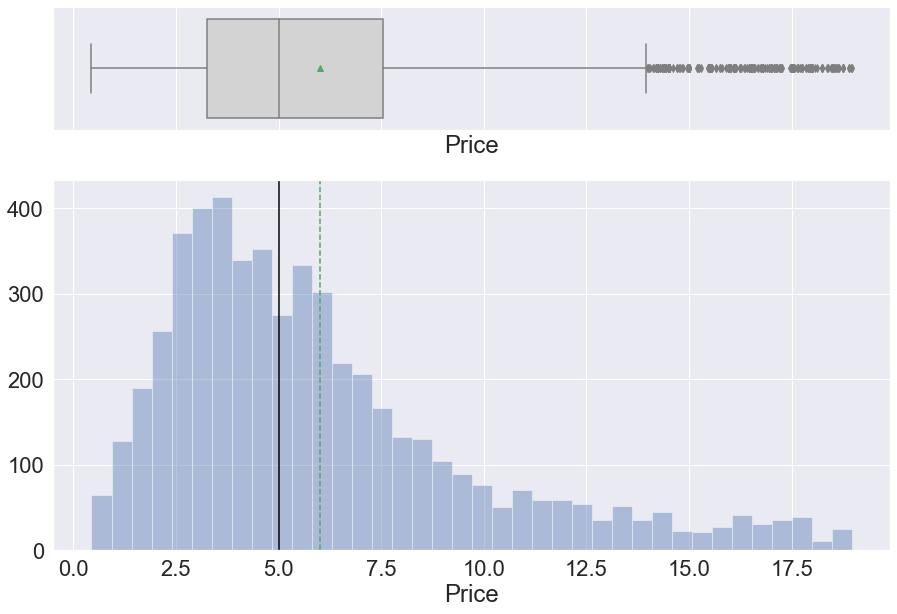

In [538]:
# Let's confirm an independent variable - Price
histogram_boxplot(clean_df2_temp.Price)

The data spike has been removed and there are now 5263 rows in the cleaned dataset. The calculated boxplot is now different because it is based on this data after outlier treatment.

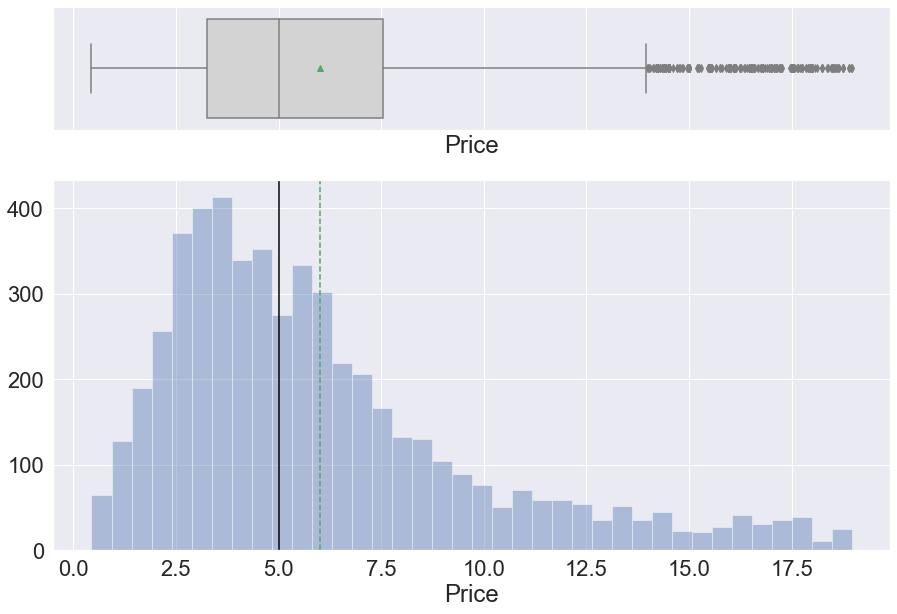

In [539]:
# Apply to clean_df2
clean_df2.drop(clean_df2[clean_df2['Price'] >= 19].index, inplace=True)

# Confirm an independent variable - Price
histogram_boxplot(clean_df2.Price)

In [540]:
clean_df2.info()    # Check the row count of the new DF

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5263 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           5263 non-null   category
 1   Year               5263 non-null   float64 
 2   Kilometers_Driven  5263 non-null   int64   
 3   Fuel_Type          5263 non-null   category
 4   Transmission       5263 non-null   category
 5   Owner_Type         5263 non-null   category
 6   Mileage            5263 non-null   float64 
 7   Engine             5263 non-null   float64 
 8   Power              5263 non-null   float64 
 9   Price              5263 non-null   float64 
 10  Make               5263 non-null   category
dtypes: category(5), float64(5), int64(1)
memory usage: 314.9 KB


In [541]:
# Delete temporary DF
del clean_df2_temp

In [542]:
# Check the head of the new DF
clean_df2.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Make
S.No.,,,,,,,,,,,
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,Maruti
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,Hyundai
2,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,Honda
3,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,Maruti
4,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74,Audi


### Re-Encode Categorical Columns

In [543]:
# Define X and y variables - independent and dependent variables
X = clean_df2.drop(["Price"], axis=1)  # Price is dropped since it is the dependent variable
y = clean_df2[["Price"]]  # double bracketts for dataframe

print(X.head())
print(y.head())

         Location    Year  Kilometers_Driven Fuel_Type Transmission  \
S.No.                                                                 
0          Mumbai  2010.0              72000       CNG       Manual   
1            Pune  2015.0              41000    Diesel       Manual   
2         Chennai  2011.0              46000    Petrol       Manual   
3         Chennai  2012.0              87000    Diesel       Manual   
4      Coimbatore  2013.0              40670    Diesel    Automatic   

      Owner_Type  Mileage  Engine   Power     Make  
S.No.                                               
0          First    26.60   998.0   58.16   Maruti  
1          First    19.67  1582.0  126.20  Hyundai  
2          First    18.20  1199.0   88.70    Honda  
3          First    20.77  1248.0   88.76   Maruti  
4         Second    15.20  1968.0  140.80     Audi  
       Price
S.No.       
0       1.75
1      12.50
2       4.50
3       6.00
4      17.74


In [544]:
# Confirm shape of each dataframe
print(X.shape)
print(y.shape)

(5263, 10)
(5263, 1)


In [545]:
# Encode categorical variables  Owner_Type, Location, Fuel_Type, Make, and Transmission
X = pd.get_dummies(X, columns=["Transmission", "Location", "Fuel_Type", "Owner_Type", "Make"], drop_first=True)
X.head()   # QC output of dummy variables

,Year,Kilometers_Driven,Mileage,Engine,Power,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,72000,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015.0,41000,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011.0,46000,18.20,1199.0,88.70,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012.0,87000,20.77,1248.0,88.76,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013.0,40670,15.20,1968.0,140.80,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Re-Create Training and Testing Datasets

In [546]:
# Create the training and testing dataframes
from sklearn.model_selection import train_test_split

X_train4, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [547]:
X_train4.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
647,2004.0,131500,6.275,1086.0,113.25305,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3191,2015.0,48300,20.000,2143.0,107.30000,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2826,2013.0,58000,19.010,1461.0,108.45000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2947,2012.0,83000,23.080,1461.0,63.10000,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3281,2013.0,34000,20.000,2143.0,107.30000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Rebuild Linear Aggression Model

In [548]:
# Fit the linear regression model on the training dataset (70% of the whole data)

linearregression = LinearRegression() # Initiate a class, create a new variable as an alias for this class
linearregression.fit(X_train4, y_train) # Fit is training the dataset - learn what is in the data

LinearRegression()

### Evaluate the Model

In [549]:
# QC the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=X_train4.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,5.632043e-01
Kilometers_Driven,-1.102861e-05
Mileage,-1.257730e-01
Engine,1.070493e-03
Power,3.510832e-02
Transmission_Manual,-6.993834e-01
Location_Bangalore,6.909390e-01
Location_Chennai,8.874706e-02
Location_Coimbatore,7.691814e-01
Location_Delhi,-5.350504e-01


In [550]:
# Make predictions on the test set
pred = linearregression.predict(X_test)

df = pd.DataFrame({"Actual": y_test.values.flatten(), "Predicted": pred.flatten()}) # Create new dataframe for the actual values and the predicted values
df

,Actual,Predicted
0,2.90,3.168539
1,9.50,10.038183
2,8.50,6.379871
3,18.00,15.861604
4,6.45,6.817410
...,...,...
1574,6.80,7.286459
1575,0.45,-2.385453
1576,2.80,1.518716
1577,3.99,5.509348


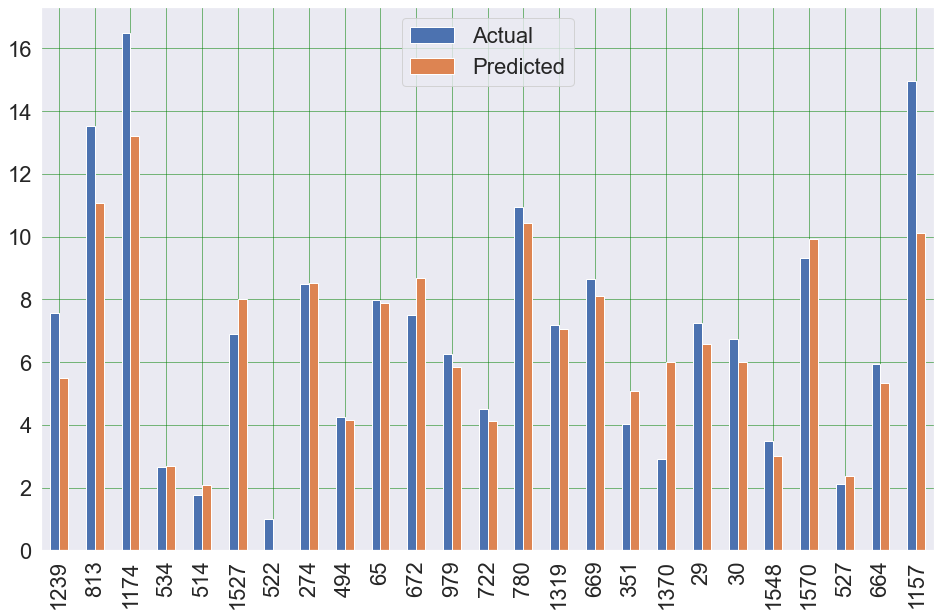

In [551]:
np.random.seed(42)     # Lets look at a sample of test data and plot the Actual vs Predicted Results
df1 = df.sample(25)
df1.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

### Check Performance of Model

This will be done using **MAE, MAPE, RMSE, $R^2$**:

* Use metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* Define a function to calculate MAPE.
* Create a function which will print out all the above metrics in one go.

In [552]:
# Check Model performance on Training dataset (seen 70% data)

print("Train Performance\n")
model_perf(linearregression, X_train4, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.197316,28.988537,1.642993,0.814502


In [553]:
# Check Model performance on Testing dataset (unseen 30% data)

print("Test Performance\n")
model_perf(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,1.240534,30.860235,1.722339,0.809517


**Observations:**

The MAE, MAPE, and RMSE have improved on this new dataset compared to the original data used for training and testing. But the $R^2$ has reduced. For example: the original training $R^2$ was 0.90 and is now 0.81.

In [554]:
# Build linear regression model using Statsmodel

import statsmodels.api as sm

# Unlike sklearn, Statsmodels does not add a constant to the data, so it must be added manually

X = sm.add_constant(X)
X_train5, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod3 = sm.OLS(y_train, X_train5)   # Build model
olsres3 = olsmod3.fit()
print(olsres3.summary())   # Print out Regression results summary

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     347.2
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:33:35   Log-Likelihood:                -7056.5
No. Observations:                3684   AIC:                         1.421e+04
Df Residuals:                    3637   BIC:                         1.450e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations:**

- **Adjusted. $R^2$**: It reflects the fit of the model.
    - Adjusted $R^2$ values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - Here the value for Adj. $R^2$ is **0.812**


- ***const* coefficient**: It is the Y-intercept.
    - It means that if all the dependent variable (features like *Country*, *Status*, *Adult_Mortality* and so on) coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for *const* coefficient is **-1085.70**
- Negative values of the coefficient show that *Price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *Price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

In [555]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series3 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series3))

VIF Scores: 

const                        832035.881714
Year                              2.181038
Kilometers_Driven                 1.992571
Mileage                           3.707987
Engine                            7.516289
Power                             5.110257
Transmission_Manual               1.676094
Location_Bangalore                2.235938
Location_Chennai                  3.001694
Location_Coimbatore               3.101137
Location_Delhi                    3.068714
Location_Hyderabad                3.692410
Location_Jaipur                   2.747590
Location_Kochi                    3.380700
Location_Kolkata                  3.216436
Location_Mumbai                   3.890738
Location_Pune                     3.500809
Fuel_Type_Diesel                 25.346175
Fuel_Type_Electric                     NaN
Fuel_Type_LPG                     1.197814
Fuel_Type_Petrol                 26.207870
Owner_Type_Fourth & Above         1.017300
Owner_Type_Second                 1.1890

- There are only there variables (categorical) witn NaN for the VIFs:  Fuel_Type_Electric, Make_Bentley, Make_Hindustan, Make_Lamborghini and Make_OpelCorsa.
- The largest VIFs are found under the Make (Brand) dummy variables.
- The Fuel_Type_Diesel and Fuel_Type_Petrol have similar large VIFs.
- The Engine has a moderate VIF and Power VIFs is slightly higher, but does not exceed the 10 cutoff.
- The Location dummy variables have low VIFs.


In [556]:
# Drop the one variable with the highest VIF value and check the adjusted R-squared
X_train6 = X_train5.drop("Engine", axis=1)   # Create new training dataset without this variable
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])],
    index=X_train6.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series4))

VIF Scores: 

const                         0.000000
Year                          2.186574
Kilometers_Driven             2.000099
Mileage                       3.016924
Power                         3.144635
Transmission_Manual           1.661813
Location_Bangalore            2.270940
Location_Chennai              3.090180
Location_Coimbatore           3.091134
Location_Delhi                3.062757
Location_Hyderabad            3.731343
Location_Jaipur               2.751878
Location_Kochi                3.468655
Location_Kolkata              3.129183
Location_Mumbai               4.041565
Location_Pune                 3.504540
Fuel_Type_Diesel             24.984231
Fuel_Type_Electric                 NaN
Fuel_Type_LPG                 1.150606
Fuel_Type_Petrol             25.634544
Owner_Type_Fourth & Above     1.018636
Owner_Type_Second             1.197994
Owner_Type_Third              1.116374
Make_Audi                          inf
Make_BMW                           inf
Make_Bentle

The only large VIFs are Fuel_Type_Diesel and Fuel_Type_Petrol. The other VIFs are small or infinti or NaN.

In [557]:
olsmod4 = sm.OLS(y_train, X_train6)   # Build model
olsres4 = olsmod4.fit()
print(olsres4.summary())   # Print out Regression results summary

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     349.2
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:33:36   Log-Likelihood:                -7081.3
No. Observations:                3684   AIC:                         1.425e+04
Df Residuals:                    3638   BIC:                         1.454e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observation:**
The p-values of **olsmod4** are small. For the categorical variables there are some large P values, but not all dummy variables hare insignificant for the Location, Fuel_Type, and Make/Brand variables. These will not be deleted.

Since MAPE is 28.9 for the Training data and 30 for the Testing data, this model is not working.
Next, is to attempt a transformation of the dependent variable Price.

In [558]:
# Confirm there are no zero values in the dataset
clean_df2.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price
count,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000
mean,2013.124644,57973.499905,18.660473,1499.659966,99.972610,6.001892
std,3.257530,30356.075869,4.230066,482.331027,35.786397,3.855379
min,2003.500000,171.000000,6.275000,624.000000,34.200000,0.440000
25%,2011.000000,35441.500000,16.000000,1197.000000,74.000000,3.250000
50%,2014.000000,55000.000000,18.600000,1396.000000,88.730000,5.000000
75%,2016.000000,75000.000000,21.500000,1598.000000,118.000000,7.540000
max,2019.000000,131500.000000,29.995000,3125.500000,228.075000,18.980000


There are no zero values.

Will transformation of the values before modeling help?

### Transformation

Since some features are skewed we will test transformations.

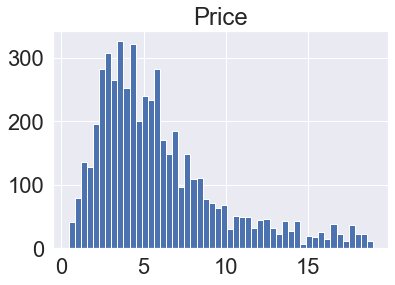

0


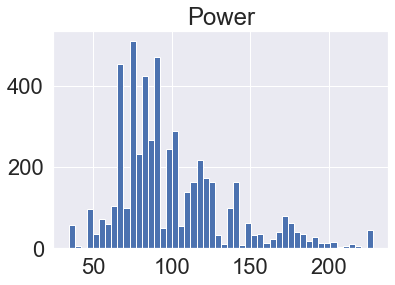

0


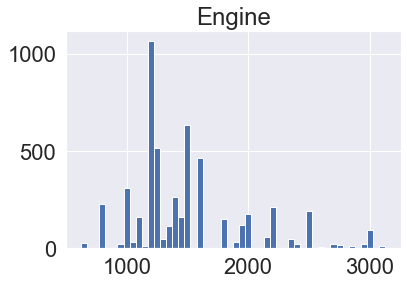

0


In [559]:
cols_to_log = ['Price', 'Power', 'Engine']
for colname in cols_to_log:
    plt.hist(clean_df2[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(clean_df2[colname] <= 0))  # Print values <= 0

**Observations:**
- There are no zero values in Price, Power, or Engine.
- The distributions for all three variables are right skewed.

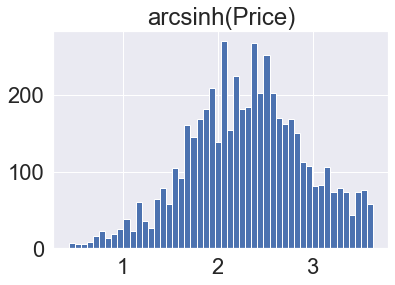

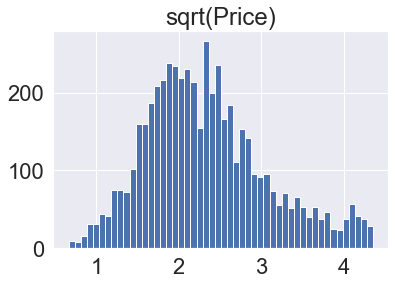

In [560]:
#plt.hist(np.log(clean_df2['Price'] + 0.1), 50) # Log requires non-zero values. If zeroes are present, add 0.1 to make this work
#plt.title('log(Wage + 0.1)')
#plt.show()
plt.hist(np.arcsinh(clean_df2['Price']), 50)
plt.title('arcsinh(Price)')
plt.show()
plt.hist(np.sqrt(clean_df2['Price']), 50)
plt.title('sqrt(Price)')
plt.show()

In [561]:
# Try the BoxCox transformation on Price
from scipy import stats
from scipy.stats import boxcox
from scipy.special import inv_boxcox

bc_price,fitted_lambda = boxcox(clean_df2['Price'],lmbda = None)
#clean_df2['Price_2']=inv_boxcox(bc_price,fitted_lambda)   # Inverse Price BoxCox transformation

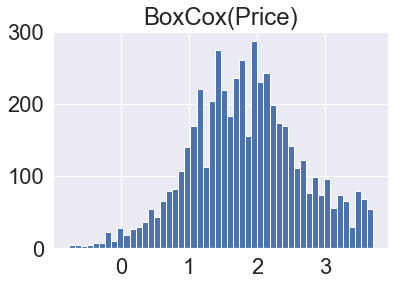

In [562]:
plt.hist(bc_price, 50)
plt.title('BoxCox(Price)')
plt.show()

**Observations:**
The Price distribution has improved after transformation. The Price BoxCox distribution is closest to Normal

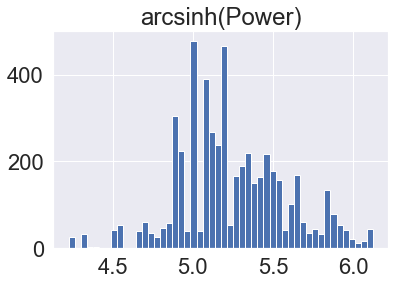

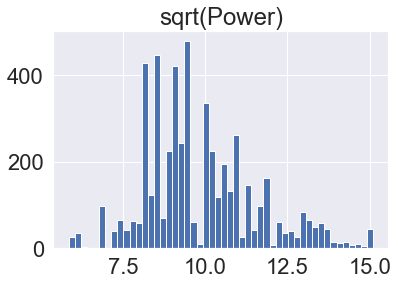

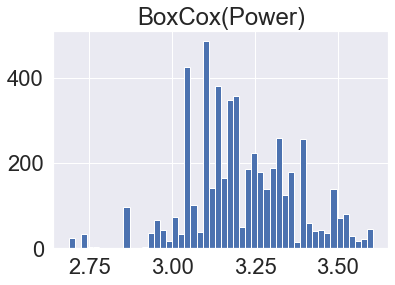

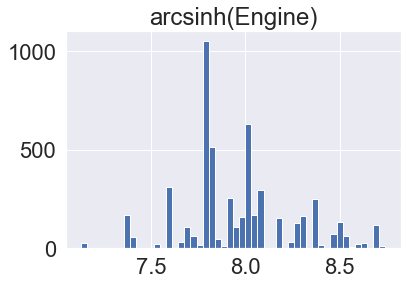

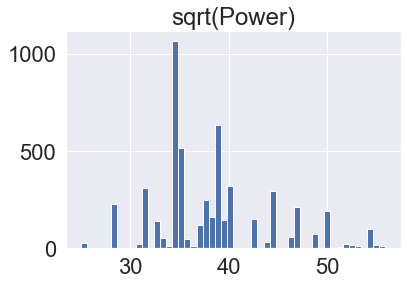

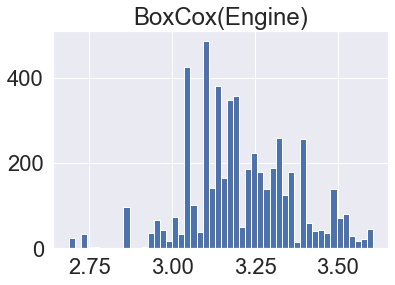

In [563]:
# Calculate BoxCox for Power and Engine also
bc_power,fitted_lambda = boxcox(clean_df2['Power'],lmbda = None)
bc_engine,fitted_lambda = boxcox(clean_df2['Engine'],lmbda = None)

# Plots for Power
plt.hist(np.arcsinh(clean_df2['Power']), 50)
plt.title('arcsinh(Power)')
plt.show()
plt.hist(np.sqrt(clean_df2['Power']), 50)
plt.title('sqrt(Power)')
plt.show()
plt.hist(bc_power, 50)
plt.title('BoxCox(Power)')
plt.show()

# Generate Plots for Engine
plt.hist(np.arcsinh(clean_df2['Engine']), 50)
plt.title('arcsinh(Engine)')
plt.show()
plt.hist(np.sqrt(clean_df2['Engine']), 50)
plt.title('sqrt(Power)')
plt.show()
plt.hist(bc_power, 50)
plt.title('BoxCox(Engine)')
plt.show()

**Observations:**
The Power and Engine distributions have improved after transformation. The Power and Enging BoxCox distributions are closest to Normal

In [564]:
clean_df2_lmbda = clean_df2.copy() 
# Make a copy to save lambda - lambda will not be used in modeling

In [565]:
for colname in cols_to_log:
    clean_df2[colname + '_log'],clean_df2['lambda'] = boxcox(clean_df2[colname],lmbda = None)


In [566]:
clean_df2_lmbda['lambda'] = clean_df2['lambda']  # save a copy of lambda for inversion and original Price, Power, and Engine
#clean_df2.drop(cols_to_log, axis=1, inplace=True)
clean_df2.drop(['lambda'], axis=1, inplace=True)

In [567]:
#  QC data frames
clean_df2.head() 
#clean_df2_lmbda.head()  # Use this line to look at Lamda

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Make,Price_log,Power_log,Engine_log
S.No.,,,,,,,,,,,,,,
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,Maruti,0.583911,2.973640,2.178514
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,Hyundai,3.074179,3.349615,2.198995
2,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,Honda,1.688343,3.184340,2.187168
3,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,Maruti,2.057226,3.184666,2.188966
4,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74,Audi,3.600366,3.399029,2.207353


**Observation:**
Lamda is a constant **-0.436501**

## Re-create Model with BoxCox transform-------------------------------------------------------------------


### Re-Encode Categorical Columns

In [568]:
# Define X and y variables - independent and dependent variables
X = clean_df2.drop(["Price_log","Price"], axis=1)  # Price is dropped since it is the dependent variable
y = clean_df2[["Price_log","Price"]]  # double bracketts for dataframe

print(X.head())
print(y.head())

         Location    Year  Kilometers_Driven Fuel_Type Transmission  \
S.No.                                                                 
0          Mumbai  2010.0              72000       CNG       Manual   
1            Pune  2015.0              41000    Diesel       Manual   
2         Chennai  2011.0              46000    Petrol       Manual   
3         Chennai  2012.0              87000    Diesel       Manual   
4      Coimbatore  2013.0              40670    Diesel    Automatic   

      Owner_Type  Mileage  Engine   Power     Make  Power_log  Engine_log  
S.No.                                                                      
0          First    26.60   998.0   58.16   Maruti   2.973640    2.178514  
1          First    19.67  1582.0  126.20  Hyundai   3.349615    2.198995  
2          First    18.20  1199.0   88.70    Honda   3.184340    2.187168  
3          First    20.77  1248.0   88.76   Maruti   3.184666    2.188966  
4         Second    15.20  1968.0  140.80     

In [569]:
# Confirm shape of each dataframe
print(X.shape)
print(y.shape)

(5263, 12)
(5263, 2)


In [570]:
# Encode categorical variables  Owner_Type, Location, Fuel_Type, Make, and Transmission
X = pd.get_dummies(X, columns=["Transmission", "Location", "Fuel_Type", "Owner_Type", "Make"], drop_first=True)
X.head()   # QC output of dummy variables

,Year,Kilometers_Driven,Mileage,Engine,Power,Power_log,Engine_log,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,72000,26.60,998.0,58.16,2.973640,2.178514,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015.0,41000,19.67,1582.0,126.20,3.349615,2.198995,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011.0,46000,18.20,1199.0,88.70,3.184340,2.187168,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012.0,87000,20.77,1248.0,88.76,3.184666,2.188966,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013.0,40670,15.20,1968.0,140.80,3.399029,2.207353,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Re-Create Training and Testing Datasets - using BoxCox transform

In [571]:
# Create the training and testing dataframes
from sklearn.model_selection import train_test_split

X_train7, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [572]:
X_train7.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Power_log,Engine_log,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
647,2004.0,131500,6.275,1086.0,113.25305,3.299883,2.182585,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3191,2015.0,48300,20.000,2143.0,107.30000,3.274746,2.210405,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2826,2013.0,58000,19.010,1461.0,108.45000,3.279726,2.195745,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2947,2012.0,83000,23.080,1461.0,63.10000,3.015472,2.195745,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3281,2013.0,34000,20.000,2143.0,107.30000,3.274746,2.210405,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [573]:
y_train.head()

,Price_log,Price
S.No.,,
647,-0.219430,0.80
3191,3.579369,17.50
2826,1.819037,4.99
2947,1.446344,3.70
3281,2.888867,11.00


## Rebuild Linear Aggression Model - using BoxCox transform

First let's split up the data for creating and QC'ing the model

In [574]:
# split up the data for creating the Model and QC'ing the model
# create the training dataset with only transformed variables to be used to create model
X_train7log = X_train7.drop(['Power','Engine'], axis=1, inplace=False)
y_trainlog = y_train.drop('Price', axis=1, inplace=False)

# create the testing dataset with only transformed variables to be used to create model
X_testlog = X_test.drop(['Power','Engine'], axis=1, inplace=False)
y_testlog = y_test.drop('Price', axis=1, inplace=False)

In [575]:
X_train7log.head()   # QC training datafram

,Year,Kilometers_Driven,Mileage,Power_log,Engine_log,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
647,2004.0,131500,6.275,3.299883,2.182585,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3191,2015.0,48300,20.000,3.274746,2.210405,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2826,2013.0,58000,19.010,3.279726,2.195745,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2947,2012.0,83000,23.080,3.015472,2.195745,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3281,2013.0,34000,20.000,3.274746,2.210405,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [576]:
y_trainlog.head()  # QC training dataframe

,Price_log
S.No.,
647,-0.219430
3191,3.579369
2826,1.819037
2947,1.446344
3281,2.888867


In [577]:
# Confirm shape of each dataframe
print(X_train7log.shape)
print(y_trainlog.shape)

(3684, 55)
(3684, 1)


In [578]:
# create the training dataset with original non-transformed variables for QC
X_train7orig = X_train7.drop(['Power_log','Engine_log'], axis=1, inplace=False)
y_trainorig = y_train.drop('Price_log', axis=1, inplace=False)

# create the testing dataset with original non-transformed variables for QC
X_testorig = X_test.drop(['Power_log','Engine_log'], axis=1, inplace=False)
y_testorig = y_test.drop('Price_log', axis=1, inplace=False)


In [579]:
X_train7orig.head()  # QC dataframe

,Year,Kilometers_Driven,Mileage,Engine,Power,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
647,2004.0,131500,6.275,1086.0,113.25305,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3191,2015.0,48300,20.000,2143.0,107.30000,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2826,2013.0,58000,19.010,1461.0,108.45000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2947,2012.0,83000,23.080,1461.0,63.10000,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3281,2013.0,34000,20.000,2143.0,107.30000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [580]:
y_trainorig.head()    # QC dataframe

,Price
S.No.,
647,0.80
3191,17.50
2826,4.99
2947,3.70
3281,11.00


In [581]:
# Confirm shape of each dataframe
print(X_train7orig.shape)
print(y_trainorig.shape)

(3684, 55)
(3684, 1)


In [582]:
# Confirm shape of each dataframe
print(X_testlog.shape)
print(y_testlog.shape)

(1579, 55)
(1579, 1)


In [583]:
# Confirm shape of each dataframe
print(X_testorig.shape)
print(y_testorig.shape)

(1579, 55)
(1579, 1)


In [584]:
# Fit the linear regression model on the training dataset (70% of the whole data)

linearregression = LinearRegression() # Initiate a class, create a new variable as an alias for this class

linearregression.fit(X_train7log, y_trainlog) # Fit is training the dataset - learn what is in the data

LinearRegression()

### Evaluate the Model - using BoxCox transform

In [585]:
# QC the coefficients and intercept of the model on the Original (Non-transformed) variables

coef_df = pd.DataFrame(
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=X_train7orig.columns.tolist() + ["Intercept"],    # Non-transformed variables
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,1.466390e-01
Kilometers_Driven,-1.950995e-06
Mileage,-1.601729e-02
Engine,1.563423e+00
Power,1.307531e+01
Transmission_Manual,-1.318905e-01
Location_Bangalore,1.901567e-01
Location_Chennai,2.034887e-02
Location_Coimbatore,1.544337e-01
Location_Delhi,-1.232772e-01


In [586]:
# Make predictions on the test set
pred = linearregression.predict(X_testlog)

df = pd.DataFrame({"Actual": y_testlog.values.flatten(), "Predicted": pred.flatten()}) # Create new dataframe for the actual values and the predicted values
df

,Actual,Predicted
0,1.154964,1.250847
1,2.680697,2.445217
2,2.525805,2.031141
3,3.622841,3.401069
4,2.152505,2.115080
...,...,...
1574,2.222782,2.300878
1575,-0.752298,-0.697784
1576,1.113868,0.852229
1577,1.538788,1.412702


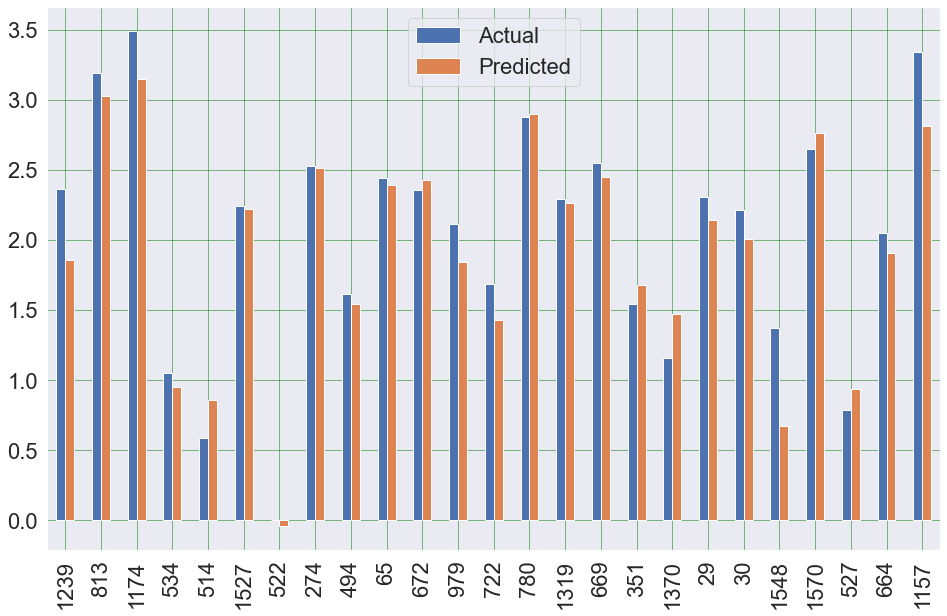

In [587]:
np.random.seed(42)     # Lets look at a sample of test data and plot the Actual vs Predicted Results
df1 = df.sample(25)
df1.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

### Check Performance of Model - using BoxCox transform

This will be done using **MAE, MAPE, RMSE, $R^2$**:

* Use metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* Define a function to calculate MAPE.
* Create a function which will print out all the above metrics in one go.

In [588]:
# Check Model performance on Training dataset (seen 70% data) that is not transformed

print("Train Performance\n")
model_perf(linearregression, X_train7log, y_trainlog)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.212239,inf,0.279349,0.883133


**Observations:**
- The MAE and RMSE are small numbers. The $R^2$ value is good at 0.88.
- The MAPE value is infinite. A better statistic could be Mean Absolute Scaled Error - MASE.

### Apply Inverse Transform Before Checking the Model

In [589]:
pred2 = linearregression.predict(X_train7log)

df3 = pd.DataFrame({"Actual_Train": y_trainlog.values.flatten(), "Predicted_Train": pred2.flatten()}) # Create new dataframe for the actual values and the predicted values
df3

,Actual_Train,Predicted_Train
0,-0.219430,0.296382
1,3.579369,3.380250
2,1.819037,1.738022
3,1.446344,1.446891
4,2.888867,2.965524
...,...,...
3679,1.884013,1.648627
3680,0.614628,0.838685
3681,2.035232,2.351762
3682,2.442467,2.760135


In [590]:
# Invert the Price Values
df3['Inv_Pred_Train'] = inv_boxcox(df3['Predicted_Train'],-0.436501)     # lambda is a constant -0.436501
df3.head()

,Actual_Train,Predicted_Train,Inv_Pred_Train
0,-0.219430,0.296382,1.373533
1,3.579369,3.380250,NaN
2,1.819037,1.738022,25.960597
3,1.446344,1.446891,9.850422
4,2.888867,2.965524,NaN


In [591]:
y_trainorig.head()  # compare the Inverted Predict Prices from the training data to the Actual/Original Price of the training data

,Price
S.No.,
647,0.80
3191,17.50
2826,4.99
2947,3.70
3281,11.00


The Inverse BoxCox functionvalues contain **NaN**! We cannot compare the Actual and Predicted values without the transformation.

It is not clear why this is happening.

In [592]:
from sklearn.metrics import mean_absolute_error

In [593]:
# Define the Mean Absolute Scaled Error - MASE also. Create new definition model_perf2

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

# defining common function for all metrics
def model_perf2(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_pred = inv_boxcox(y_pred,-0.436501)
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "MASE": mean_absolute_scaled_error(y_act, y_pred, y_train),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [594]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf2(linearregression, X_train7log, y_trainlog)

Train Performance



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**Observation:**
- The MASE value is NaN since the Inverted Price contains NaN values.
- Let's use the Log function instead

## Log Transform!!!!

In [595]:
clean_df3 = clean_df2.copy() 
clean_df3.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Make,Price_log,Power_log,Engine_log
S.No.,,,,,,,,,,,,,,
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,Maruti,0.583911,2.973640,2.178514
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,Hyundai,3.074179,3.349615,2.198995


In [596]:
clean_df3.drop(['Price_log','Power_log','Engine_log'], axis=1, inplace=True)
clean_df3.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Make
S.No.,,,,,,,,,,,
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,Maruti
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,Hyundai


In [597]:
for colname in cols_to_log:
    clean_df3[colname + '_log'] = np.arcsinh(clean_df3[colname])


In [598]:
clean_df3.head(2) 

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Make,Price_log,Power_log,Engine_log
S.No.,,,,,,,,,,,,,,
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,Maruti,1.325898,4.756419,7.598901
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,Hyundai,3.220472,5.531031,8.059592


### Re-encode Categorical Variables - Log transform

In [599]:
# Define X and y variables - independent and dependent variables
X = clean_df3.drop(["Price_log","Price"], axis=1)  # Price is dropped since it is the dependent variable
y = clean_df3[["Price_log","Price"]]  # double bracketts for dataframe

print(X.head())
print(y.head())

         Location    Year  Kilometers_Driven Fuel_Type Transmission  \
S.No.                                                                 
0          Mumbai  2010.0              72000       CNG       Manual   
1            Pune  2015.0              41000    Diesel       Manual   
2         Chennai  2011.0              46000    Petrol       Manual   
3         Chennai  2012.0              87000    Diesel       Manual   
4      Coimbatore  2013.0              40670    Diesel    Automatic   

      Owner_Type  Mileage  Engine   Power     Make  Power_log  Engine_log  
S.No.                                                                      
0          First    26.60   998.0   58.16   Maruti   4.756419    7.598901  
1          First    19.67  1582.0  126.20  Hyundai   5.531031    8.059592  
2          First    18.20  1199.0   88.70    Honda   5.178439    7.782391  
3          First    20.77  1248.0   88.76   Maruti   5.179115    7.822445  
4         Second    15.20  1968.0  140.80     

In [600]:
# Confirm shape of each dataframe
print(X.shape)
print(y.shape)

(5263, 12)
(5263, 2)


In [601]:
# Encode categorical variables  Owner_Type, Location, Fuel_Type, Make, and Transmission
X = pd.get_dummies(X, columns=["Transmission", "Location", "Fuel_Type", "Owner_Type", "Make"], drop_first=True)
X.head()   # QC output of dummy variables

,Year,Kilometers_Driven,Mileage,Engine,Power,Power_log,Engine_log,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,72000,26.60,998.0,58.16,4.756419,7.598901,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015.0,41000,19.67,1582.0,126.20,5.531031,8.059592,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011.0,46000,18.20,1199.0,88.70,5.178439,7.782391,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012.0,87000,20.77,1248.0,88.76,5.179115,7.822445,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013.0,40670,15.20,1968.0,140.80,5.640500,8.277920,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Re-create Model with Log transform-------------------------------------------------------------------


### Re-Create Training and Testing Datasets - using Log transform

In [602]:
# Create the training and testing dataframes
from sklearn.model_selection import train_test_split

X_train8, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [603]:
X_train8.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Power_log,Engine_log,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
647,2004.0,131500,6.275,1086.0,113.25305,5.422791,7.683404,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3191,2015.0,48300,20.000,2143.0,107.30000,5.368798,8.363109,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2826,2013.0,58000,19.010,1461.0,108.45000,5.379458,7.980024,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2947,2012.0,83000,23.080,1461.0,63.10000,4.837931,7.980024,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3281,2013.0,34000,20.000,2143.0,107.30000,5.368798,8.363109,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [604]:
y_train.head()

,Price_log,Price
S.No.,,
647,0.732668,0.80
3191,3.556163,17.50
2826,2.310475,4.99
2947,2.019261,3.70
3281,3.093102,11.00


## Rebuild Linear Aggression Model - using Log transform

First let's split up the data for creating and QC'ing the model

In [605]:
# split up the data for creating the Model and QC'ing the model
# create the training dataset with only transformed variables to be used to create model
X_train8log = X_train8.drop(['Power','Engine'], axis=1, inplace=False)
y_trainlog = y_train.drop('Price', axis=1, inplace=False)

# create the testing dataset with only transformed variables to be used to create model
X_testlog = X_test.drop(['Power','Engine'], axis=1, inplace=False)
y_testlog = y_test.drop('Price', axis=1, inplace=False)

In [606]:
X_train8log.head()   # QC training datafram

,Year,Kilometers_Driven,Mileage,Power_log,Engine_log,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
647,2004.0,131500,6.275,5.422791,7.683404,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3191,2015.0,48300,20.000,5.368798,8.363109,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2826,2013.0,58000,19.010,5.379458,7.980024,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2947,2012.0,83000,23.080,4.837931,7.980024,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3281,2013.0,34000,20.000,5.368798,8.363109,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [607]:
y_trainlog.head()   # QC training datafram

,Price_log
S.No.,
647,0.732668
3191,3.556163
2826,2.310475
2947,2.019261
3281,3.093102


In [608]:
# Confirm shape of each dataframe
print(X_train8log.shape)
print(y_trainlog.shape)

(3684, 55)
(3684, 1)


In [609]:
# create the training dataset with original non-transformed variables for QC
X_train8orig = X_train8.drop(['Power_log','Engine_log'], axis=1, inplace=False)
y_trainorig = y_train.drop('Price_log', axis=1, inplace=False)

# create the testing dataset with original non-transformed variables for QC
X_testorig = X_test.drop(['Power_log','Engine_log'], axis=1, inplace=False)
y_testorig = y_test.drop('Price_log', axis=1, inplace=False)


In [610]:
X_train8orig.head()  # QC dataframe

,Year,Kilometers_Driven,Mileage,Engine,Power,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
647,2004.0,131500,6.275,1086.0,113.25305,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3191,2015.0,48300,20.000,2143.0,107.30000,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2826,2013.0,58000,19.010,1461.0,108.45000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2947,2012.0,83000,23.080,1461.0,63.10000,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3281,2013.0,34000,20.000,2143.0,107.30000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [611]:
y_trainorig.head()  # QC dataframe

,Price
S.No.,
647,0.80
3191,17.50
2826,4.99
2947,3.70
3281,11.00


In [612]:
# Confirm shape of each dataframe
print(X_train7orig.shape)
print(y_trainorig.shape)

(3684, 55)
(3684, 1)


In [613]:
# Confirm shape of each dataframe
print(X_testlog.shape)
print(y_testlog.shape)

(1579, 55)
(1579, 1)


In [614]:
# Confirm shape of each dataframe
print(X_testorig.shape)
print(y_testorig.shape)

(1579, 55)
(1579, 1)


In [615]:
# Fit the linear regression model on the training dataset (70% of the whole data)

linearregression = LinearRegression() # Initiate a class, create a new variable as an alias for this class

linearregression.fit(X_train8log, y_trainlog) # Fit is training the dataset - learn what is in the data

LinearRegression()

### Evaluate the Model - using Log transform

In [616]:
# QC the coefficients and intercept of the model on the Original (Non-transformed) variables

coef_df = pd.DataFrame(
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=X_train7orig.columns.tolist() + ["Intercept"],    # Non-transformed variables
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,1.122236e-01
Kilometers_Driven,-1.462236e-06
Mileage,-8.551666e-03
Engine,5.627954e-01
Power,4.891927e-01
Transmission_Manual,-8.782107e-02
Location_Bangalore,1.457341e-01
Location_Chennai,1.703924e-02
Location_Coimbatore,1.166831e-01
Location_Delhi,-9.190038e-02


In [617]:
# Make predictions on the test set
pred = linearregression.predict(X_testlog)

df4 = pd.DataFrame({"Actual": y_testlog.values.flatten(), "Predicted": pred.flatten()}) # Create new dataframe for the actual values and the predicted values
df4

,Actual,Predicted
0,1.786340,1.856461
1,2.947198,2.712913
2,2.836656,2.444510
3,3.584290,3.508509
4,2.563183,2.517766
...,...,...
1574,2.615433,2.660119
1575,0.436050,0.404442
1576,1.753229,1.557717
1577,2.092284,2.022567


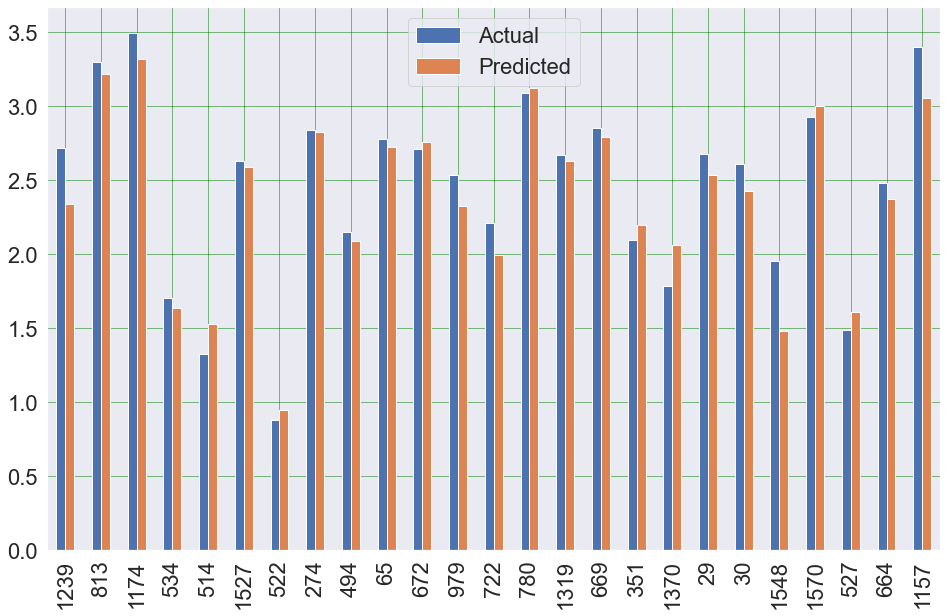

In [618]:
np.random.seed(42)     # Lets look at a sample of test data and plot the Actual vs Predicted Results
df1 = df4.sample(25)
df1.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

### Check Performance of Model - using BoxCox transform

This will be done using **MAE, MAPE, RMSE, $R^2$**:

* Use metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* Define a function to calculate MAPE.
* Create a function which will print out all the above metrics in one go.

In [619]:
# Check Model performance on Training dataset (seen 70% data) that is not transformed

print("Train Performance\n")
model_perf(linearregression, X_train7log, y_trainlog)

Train Performance



,MAE,MAPE,RMSE,R^2
0,3.964408,186.129992,3.976451,-40.503319


**Observations:**
- The MAE and RMSE are good at 3.96 and 3.97, respectively.
- The $R^2$ value is -40.5 and the MAPE is very large at 186.

### Apply Inverse Transform Before Checking the Model

In [620]:
pred3 = linearregression.predict(X_train8log)

df5 = pd.DataFrame({"Actual_Train": y_trainlog.values.flatten(), "Predicted_Train": pred2.flatten()}) # Create new dataframe for the actual values and the predicted values
df5

,Actual_Train,Predicted_Train
0,0.732668,0.296382
1,3.556163,3.380250
2,2.310475,1.738022
3,2.019261,1.446891
4,3.093102,2.965524
...,...,...
3679,2.360325,1.648627
3680,1.350441,0.838685
3681,2.475205,2.351762
3682,2.776472,2.760135


In [621]:
# Invert the Price Values
df5['Inv_Pred_Train'] = np.sinh(df5['Predicted_Train']) 
df5.head()

,Actual_Train,Predicted_Train,Inv_Pred_Train
0,0.732668,0.296382,0.300740
1,3.556163,3.380250,14.672035
2,2.310475,1.738022,2.755109
3,2.019261,1.446891,2.007289
4,3.093102,2.965524,9.676666


In [622]:
y_trainorig.head()  # compare the Inverted Predict Prices from the training data to the Actual/Original Price of the training data

,Price
S.No.,
647,0.80
3191,17.50
2826,4.99
2947,3.70
3281,11.00


**Observations:**
The inverse log has returned values that are similar in scale to the Original Priced values.

In [623]:
# Define the Mean Absolute Scaled Error - MASE also. Create new definition model_perf2

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

# defining common function for all metrics
def model_perf3(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_pred = np.sinh(y_pred)   # apply the inverse
    y_act = out.values.flatten()
    y_act = np.sinh(y_act)

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            #"MASE": mean_absolute_scaled_error(y_act, y_pred, y_train),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [624]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf3(linearregression, X_train8log, y_trainlog)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.948782,17.376668,1.443206,0.856872


In [625]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
model_perf3(linearregression, X_testlog, y_testlog)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.982311,16.867991,1.522121,0.851229


**Observations**

- The training and testing scores $R^2$ are 85.6% and 85.1% respectively. The model is a good fit.

- MAE indicates that our current model is able to predict Price within a mean error of 0.9 Lakhs on the test data.

- MAPE on the test set suggests we can predict within 17% of the Price. This is not a good value, but is less than the original 30%.

### Build OLSModel - using Log Transform   ---------------------------------------------------------------------------

In [626]:
# Build linear regression model using Statsmodel

import statsmodels.api as sm

# Unlike sklearn, Statsmodels does not add a constant to the data, so it must be added manually

X = sm.add_constant(X)
X_train9, X_test9, y_train9, y_test9 = train_test_split(
    X_train8log, y_trainlog, test_size=0.3, random_state=42
)

olsmod5 = sm.OLS(y_train9, X_train9)   # Build model
olsres5 = olsmod5.fit()
print(olsres5.summary())   # Print out Regression results summary

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     415.4
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:36:21   Log-Likelihood:                 346.73
No. Observations:                2578   AIC:                            -599.5
Df Residuals:                    2531   BIC:                            -324.3
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

**Observations:**
- **Adjusted. $R^2$**: It reflects the fit of the model.
    - Adjusted $R^2$ values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - Here the value for Adj. $R^2$ is **0.881**


- ***const* coefficient**: It is the Y-intercept.
    - It means that if all the dependent variable (features like *Country*, *Status*, *Adult_Mortality* and so on) coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for *const* coefficient is not shown
- Negative values of the coefficient show that *Price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *Price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.


## Check Linear Regression Assumptions

**1. No Multicollinearity**

**2. Mean of residuals should be 0**

**3. No Heteroscedasticity**

**4. Linearity of variables**

**5. Normality of error terms**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* **General Rule of thumb**: If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all. Whereas, if VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity, and if it is 10 or exceeding 10, it shows signs of high multicollinearity.

In [628]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series5 = pd.Series(
    [variance_inflation_factor(X_train9.values, i) for i in range(X_train9.shape[1])], 
    index=X_train9.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series5))

VIF Scores: 

Year                              2.298857
Kilometers_Driven                 2.032300
Mileage                           3.664187
Power_log                         5.076223
Engine_log                        8.257980
Transmission_Manual               1.651413
Location_Bangalore                2.251789
Location_Chennai                  3.043596
Location_Coimbatore               3.036968
Location_Delhi                    3.063145
Location_Hyderabad                3.657489
Location_Jaipur                   2.798902
Location_Kochi                    3.385101
Location_Kolkata                  2.979164
Location_Mumbai                   3.933337
Location_Pune                     3.522165
Fuel_Type_Diesel                 22.221696
Fuel_Type_Electric                     NaN
Fuel_Type_LPG                     1.111466
Fuel_Type_Petrol                 23.013853
Owner_Type_Fourth & Above         1.028726
Owner_Type_Second                 1.248194
Owner_Type_Third                  1.1283

- There are only there variables (categorical) witn NaN for the VIFs:  Fuel_Type_Electric, Make_Hindustan, Make Isuzu, Make_Jaguar, Make_Lamborghini, Make_Mini, and Make_OpelCorsa.
- The largest VIFs are found under the Make (Brand) dummy variables. All of the Make VIFs are larger than 10.
- The Fuel_Type_Diesel and Fuel_Type_Petrol have similar large VIFs.
- The Engine and Power VIFs are similar, suggesting moderate collinearity.
- The Location dummy variables have low VIFs.

## Removing Collinearity

To remove multicollinearity

1. Drop every column one by one that has VIF score greater than 5.
2. Look at the adjusted R-squared of all these models.
3. Drop the variable that makes least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

In [629]:
# Drop the variable with the highest vif values and check the adjusted R-squared
# The highest values are for the Make, and each one has a high variable
cols_to_drp = ['Make_Audi', 'Make_BMW', 'Make_Bentley', 'Make_Chevrolet', 'Make_Datsun',
               'Make_Fiat', 'Make_Force', 'Make_Ford','Make_Hindustan','Make_Honda',
               'Make_Hyundai', 'Make_ISUZU', 'Make_Isuzu', 'Make_Jaguar', 'Make_Jeep',
               'Make_Lamborghini', 'Make_Land', 'Make_Mahindra', 'Make_Maruti', 'Make_Mercedes-Benz',
               'Make_Mini', 'Make_Mitsubishi', 'Make_Nissan', 'Make_OpelCorsa', 'Make_Porsche',
               'Make_Renault', 'Make_Skoda', 'Make_Smart', 'Make_Tata', 'Make_Toyota', 'Make_Volkswagen',
               'Make_Volvo']
X_train10 = X_train9.drop(cols_to_drp, axis=1)   # create new training dataset
X_train10.head()


,Year,Kilometers_Driven,Mileage,Power_log,Engine_log,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,,,
3189,2003.5,67000,6.275,5.422791,7.599902,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2298,2011.0,85000,16.550,5.687055,8.277920,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
650,2017.0,36381,28.090,5.176182,7.822445,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5999,2016.0,10000,17.570,5.178439,7.777374,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1033,2016.0,14656,24.400,4.955877,7.714231,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [630]:
vif_series6 = pd.Series(
    [variance_inflation_factor(X_train10.values, i) for i in range(X_train10.shape[1])],
    index=X_train10.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series6))

VIF Scores: 

Year                         3236.422580
Kilometers_Driven               7.508095
Mileage                        55.342922
Power_log                     964.234052
Engine_log                   4355.328539
Transmission_Manual             6.805800
Location_Bangalore              2.336261
Location_Chennai                3.286275
Location_Coimbatore             3.244096
Location_Delhi                  3.351382
Location_Hyderabad              4.111570
Location_Jaipur                 2.978616
Location_Kochi                  3.656117
Location_Kolkata                3.213947
Location_Mumbai                 4.484110
Location_Pune                   3.922130
Fuel_Type_Diesel               42.824692
Fuel_Type_Electric                   NaN
Fuel_Type_LPG                   1.107872
Fuel_Type_Petrol               44.309137
Owner_Type_Fourth & Above       1.016351
Owner_Type_Second               1.362341
Owner_Type_Third                1.101121
dtype: float64



In [632]:
# Drop the variable with the highest vif values and check the adjusted R-squared
# The highest value is for the Engine

X_train11 = X_train10.drop('Engine_log', axis=1)   # create new training dataset
X_train11.head()

,Year,Kilometers_Driven,Mileage,Power_log,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,,
3189,2003.5,67000,6.275,5.422791,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2298,2011.0,85000,16.550,5.687055,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
650,2017.0,36381,28.090,5.176182,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5999,2016.0,10000,17.570,5.178439,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1033,2016.0,14656,24.400,4.955877,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [633]:
vif_series7 = pd.Series(
    [variance_inflation_factor(X_train11.values, i) for i in range(X_train11.shape[1])],
    index=X_train11.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series7))

VIF Scores: 

Year                         858.011637
Kilometers_Driven              7.413148
Mileage                       38.516523
Power_log                    514.059657
Transmission_Manual            6.781493
Location_Bangalore             2.335779
Location_Chennai               3.286067
Location_Coimbatore            3.243367
Location_Delhi                 3.350874
Location_Hyderabad             4.111457
Location_Jaipur                2.978293
Location_Kochi                 3.655406
Location_Kolkata               3.213838
Location_Mumbai                4.477832
Location_Pune                  3.922055
Fuel_Type_Diesel              42.720126
Fuel_Type_Electric                  NaN
Fuel_Type_LPG                  1.105666
Fuel_Type_Petrol              43.389833
Owner_Type_Fourth & Above      1.015951
Owner_Type_Second              1.360624
Owner_Type_Third               1.099348
dtype: float64



In [634]:
# Drop the variable with the highest vif values and check the adjusted R-squared
# The highest value is for the Year

X_train12 = X_train11.drop('Year', axis=1)   # create new training dataset
X_train12.head()

,Kilometers_Driven,Mileage,Power_log,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,
3189,67000,6.275,5.422791,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2298,85000,16.550,5.687055,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
650,36381,28.090,5.176182,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5999,10000,17.570,5.178439,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1033,14656,24.400,4.955877,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [635]:
vif_series8 = pd.Series(
    [variance_inflation_factor(X_train12.values, i) for i in range(X_train12.shape[1])],
    index=X_train12.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series8))

VIF Scores: 

Kilometers_Driven             7.320870
Mileage                      20.626050
Power_log                    99.341460
Transmission_Manual           5.826038
Location_Bangalore            2.285761
Location_Chennai              3.201440
Location_Coimbatore           3.156992
Location_Delhi                3.294112
Location_Hyderabad            3.933377
Location_Jaipur               2.877635
Location_Kochi                3.574135
Location_Kolkata              3.145554
Location_Mumbai               4.341547
Location_Pune                 3.801537
Fuel_Type_Diesel             40.453985
Fuel_Type_Electric                 NaN
Fuel_Type_LPG                 1.084985
Fuel_Type_Petrol             37.983137
Owner_Type_Fourth & Above     1.014379
Owner_Type_Second             1.359981
Owner_Type_Third              1.098876
dtype: float64



In [636]:
# Drop the variable with the highest vif values and check the adjusted R-squared
# The highest value is for the Year

X_train13 = X_train12.drop('Power_log', axis=1)   # create new training dataset
X_train13.head()

,Kilometers_Driven,Mileage,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,
3189,67000,6.275,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2298,85000,16.550,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
650,36381,28.090,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5999,10000,17.570,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1033,14656,24.400,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [637]:
vif_series9 = pd.Series(
    [variance_inflation_factor(X_train13.values, i) for i in range(X_train13.shape[1])],
    index=X_train13.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series9))

VIF Scores: 

Kilometers_Driven             6.642703
Mileage                      19.412868
Transmission_Manual           5.697282
Location_Bangalore            2.127447
Location_Chennai              3.011741
Location_Coimbatore           2.897711
Location_Delhi                2.963544
Location_Hyderabad            3.710806
Location_Jaipur               2.757721
Location_Kochi                3.206310
Location_Kolkata              2.875217
Location_Mumbai               3.688979
Location_Pune                 3.492718
Fuel_Type_Diesel             17.395186
Fuel_Type_Electric                 NaN
Fuel_Type_LPG                 1.039742
Fuel_Type_Petrol             15.155788
Owner_Type_Fourth & Above     1.014376
Owner_Type_Second             1.357460
Owner_Type_Third              1.098816
dtype: float64



In [638]:
# Drop the variable with the highest vif values and check the adjusted R-squared
# The highest value is for the Year

X_train14 = X_train13.drop('Mileage', axis=1)   # create new training dataset
X_train14.head()

,Kilometers_Driven,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,
3189,67000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2298,85000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
650,36381,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5999,10000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1033,14656,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [639]:
vif_series10 = pd.Series(
    [variance_inflation_factor(X_train14.values, i) for i in range(X_train14.shape[1])],
    index=X_train14.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series10))

VIF Scores: 

Kilometers_Driven             6.398904
Transmission_Manual           4.985762
Location_Bangalore            2.077543
Location_Chennai              2.863836
Location_Coimbatore           2.758073
Location_Delhi                2.835883
Location_Hyderabad            3.521645
Location_Jaipur               2.620818
Location_Kochi                3.034637
Location_Kolkata              2.760778
Location_Mumbai               3.516672
Location_Pune                 3.298714
Fuel_Type_Diesel             12.560109
Fuel_Type_Electric                 NaN
Fuel_Type_LPG                 1.033198
Fuel_Type_Petrol             11.994881
Owner_Type_Fourth & Above     1.009873
Owner_Type_Second             1.352158
Owner_Type_Third              1.092577
dtype: float64



- The only large VIFs are found under the Fuel_Type, but not all of the values are large.
- The Fuel_Type_Diesel and Fuel_Type_Petrol have similar large VIFs.
- The Location dummy variables have low VIFs.

In [640]:
olsmod6 = sm.OLS(y_train9, X_train14)   # Build model
olsres6 = olsmod6.fit()
print(olsres6.summary())   # Print out Regression results summary

                                 OLS Regression Results                                
Dep. Variable:              Price_log   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              2815.
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                        0.00
Time:                        23:13:04   Log-Likelihood:                         -1991.6
No. Observations:                2578   AIC:                                      4019.
Df Residuals:                    2560   BIC:                                      4125.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

**Observations**

- Now the adjusted $R^2$ is 0.952 - the model is able to explain 95.2% of variance. 
- The adjusted $R^2$ in *olsres0* (where we considered all the variables) was 0.902. This shows that the variables we dropped had a small affect on the model.
- The P-values are all less than 0.05 (level of significance).

**--------------------------------------------------------------------------------------------------------------------------**
## Check the rest of the assumptions on Model *olsres6*

2. Mean of residuals should be 0 
3. Linearity of variables
4. Normality of error terms
5. No Heteroscedasticity

### MEAN of Residuals should be 0

In [641]:
residual = olsres6.resid
np.mean(residual)

0.024126266896219294

**Observation:**
The mean of the residual is small.

### Test for Linearity

- Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

- Check linearity: Make a plot of fitted values vs residuals, if there's no pattern, the model is linear, otherwise model shows signs of non-linearity.

- If the assumption is not followed, can try to transform the variables and make the relationships linear.

In [642]:
residual = olsres6.resid
fitted = olsres6.fittedvalues  # Predicted values

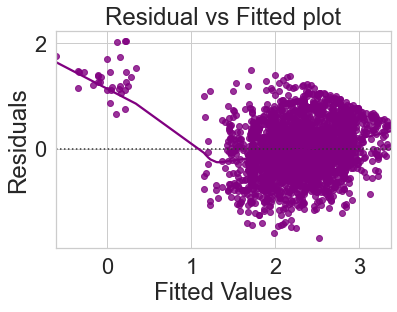

In [643]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

**Observations:**
There is no pattern in the residuals plot and therefore the model is linear. The assumption is satisfied.

### Test for Normality

- Error terms/Residuals should be normally distributed

- If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

- Non-normality suggests that there are a few unusual data points which must be studied closely to make a better model.

- Normality can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

- Another test to check for normality is the Shapiro-Wilk test.

- If the residuals are not-normal, can apply transformations like log, exponential, arcsinh, etc. as per our data.

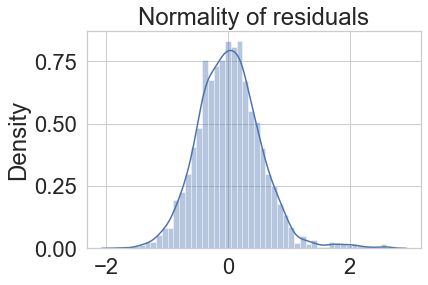

In [644]:
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

Creat Q-Q plot to check normality assumption - should plot as a straight line.

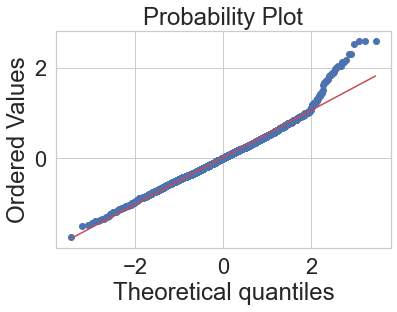

In [645]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

In [646]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9779825210571289, pvalue=1.5316930544508263e-19)

**Observations:**
- The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.

### Test for Homoscedasticity

Goldfeldquandt test

- **Homoscedacity**: If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

- **Heteroscedacity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

For goldfeldquandt test, the null and alternate hypotheses are as follows:

- $H_0$    Null hypothesis : Residuals are homoscedastic
- $H_a$    Alternate hypothesis : Residuals have heteroscedasticity    

In [648]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train14)
lzip(name, test)

[('F statistic', 0.8838666073494922), ('p-value', 0.9860921125371046)]

**Observations:**

- Since p-value > 0.05, the residuals are homoscedastic. This assumption is therefore valid in the data.

### Prediction on Test Dataset

In [649]:
X_train14.columns

Index(['Kilometers_Driven', 'Transmission_Manual', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [666]:
# Select columns from Test dataset that used to create final model
X_test_final = X_test9[X_train14.columns]

In [667]:
X_test_final.head()

,Kilometers_Driven,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,
4288,63000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1330,62946,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1760,88000,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4337,32283,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
5757,31000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [668]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf3(olsres6, X_train14.values, y_train9)

Train Performance



,MAE,MAPE,RMSE,R^2
0,2.217476,45.064053,3.109059,0.342778


In [669]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
model_perf3(olsres6, X_test_final.values, y_test9)

Test Performance



,MAE,MAPE,RMSE,R^2
0,2.214966,44.41015,3.103713,0.321017


**Observations:**


In [670]:
# Print the model summary

olsmod6 = sm.OLS(y_train9, X_train14)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                                 OLS Regression Results                                
Dep. Variable:              Price_log   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              2815.
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                        0.00
Time:                        23:59:53   Log-Likelihood:                         -1991.6
No. Observations:                2578   AIC:                                      4019.
Df Residuals:                    2560   BIC:                                      4125.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

## Conclusions

***olsres6* is the final model which follows all the assumptions, and can be used for interpretations.**

1. Fuel Type is very significant, as expected. There are three variables - *Diesel*, *LPG*, and *Petrol*. *Electric* cars do not have a significant impact on *Price*.


2. The higher the Owner Type results in a decrease in *Price*. This is reflected in the negative coefficient signs.


3. The higher the *Kilometers Driven* results in a decrease in *Price*. This is reflected in the negative coefficient signs.


4.  The *Location* is a categorical variable that has a positive relationship with *Price*.


5. There are only two Transmission types. The Manual Transmission type has a negative coefficent - this reflects that *Price* decreases with Manaul Transmission vehicles.
